In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
plt.style.use(mplhep.style.CMS)

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


In [ ]:
# def get_data( fileNames ):
    
#     df_protons_multiRP_list = []
#     df_protons_singleRP_list = []
#     df_ppstracks_list = []
#     df_counts_list = []

#     for file_ in fileNames:
#         print ( file_ )
#         with h5py.File( file_, 'r' ) as f:
#             print ( list(f.keys()) )

#             dset_protons_multiRP = f['protons_multiRP']
#             print ( dset_protons_multiRP.shape )
#             print ( dset_protons_multiRP[:,:] )

#             dset_protons_singleRP = f['protons_singleRP']
#             print ( dset_protons_singleRP.shape )
#             print ( dset_protons_singleRP[:,:] )

#             dset_ppstracks = f['ppstracks']
#             print ( dset_ppstracks.shape )
#             print ( dset_ppstracks[:,:] )

#             dset_columns_protons = f['columns_protons']
#             print ( dset_columns_protons.shape )
#             columns_protons = list( dset_columns_protons )
#             print ( columns_protons )
#             columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
#             print ( columns_protons_str )

#             dset_columns_ppstracks = f['columns_ppstracks']
#             print ( dset_columns_ppstracks.shape )
#             columns_ppstracks = list( dset_columns_ppstracks )
#             print ( columns_ppstracks )
#             columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
#             print ( columns_ppstracks_str )

#             dset_selections = f['selections']
#             selections_ = [ item.decode("utf-8") for item in dset_selections ]
#             print ( selections_ )

#             dset_counts = f['event_counts']
#             df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
#             print ( df_counts_list[-1] )

#             chunk_size = 1000000
#             entries_protons_multiRP = dset_protons_multiRP.shape[0]
#             start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_multiRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_multiRP_list.append( df_ )
#                 print ( df_protons_multiRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

#             entries_protons_singleRP = dset_protons_singleRP.shape[0]
#             start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_singleRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_singleRP_list.append( df_ )
#                 print ( df_protons_singleRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

#             entries_ppstracks = dset_ppstracks.shape[0]
#             start_ = list( range( 0, entries_ppstracks, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_ppstracks )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
#                 df_ppstracks_list.append( df_ )
#                 print ( df_ppstracks_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

#     df_counts = df_counts_list[0]
#     for idx in range( 1, len( df_counts_list ) ):
#         df_counts = df_counts.add( df_counts_list[idx] )
#     print ( df_counts )

#     df_protons_multiRP = pd.concat( df_protons_multiRP_list )
#     print (df_protons_multiRP)

#     df_protons_singleRP = pd.concat( df_protons_singleRP_list )
#     print (df_protons_singleRP)

#     df_ppstracks = pd.concat( df_ppstracks_list )
#     print (df_ppstracks)
    
#     return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [ ]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

In [ ]:
# # Per data period, arm=(0,1)
# # Periods: "2016_preTS2", "2016_postTS2", "2017_preTS2", "2017_postTS2", "2018"
# def aperture_parametrisation( period, arm, xangle, xi ):

#     #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

#     if (period == "2016_preTS2"):
#         if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
#         elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
#     elif (period == "2016_postTS2"):
#         if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
#         elif (arm == 1): return (xi-0.110)/130.0;
#     elif (period == "2017_preTS2"):
#         if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
#         elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
#     elif (period == "2017_postTS2"):
#         if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
#         elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
#     elif (period == "2018"):
#         if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
#         elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
#     else:
#         return -999.

# def check_aperture( period, arm, xangle, xi, theta_x ):
#     return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

In [ ]:
# def process_data_protons_multiRP( df_protons_multiRP, df_ppstracks=None, runOnMC=False ):

#     if not runOnMC:
#         df_protons_multiRP.loc[ :, "period" ] = np.nan
#         for idx_ in range( df_run_ranges.shape[0] ):
#             msk_period_ = ( ( df_protons_multiRP.loc[ :, "run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_protons_multiRP.loc[ :, "run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#             sum_period_ = np.sum( msk_period_ )
#             if sum_period_ > 0:
#                 period_key_ = df_run_ranges.index[ idx_ ]
#                 df_protons_multiRP.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#                 print ( "{}: {}".format( period_key_, sum_period_ ) )

#         df_protons_multiRP.loc[ :, "within_aperture" ] = df_protons_multiRP.apply(
#                 lambda row: check_aperture( aperture_period_map[ row["period"] ], row["arm"], 120., row["xi"], row["thx"] ), # FIXME
#                 axis=1
#                 )
    
#     df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

#     df_ppstracks_index = None
#     if not df_ppstracks is None:
#         df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_x2" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y2" ] = np.nan
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]

#     df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
#     df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

#     df_protons_multiRP_events.loc[ :, "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
#     df_protons_multiRP_events.loc[ :, "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
#     return (df_protons_multiRP_index, df_protons_multiRP_events, df_ppstracks_index)

### Signal

In [3]:
run_tables = True

label = "GGToWW-AQGC-A0W1e-6"

fileNames_signal = [
    "output-GGToWW-AQGC-A0W1e-6.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = get_data( fileNames_signal )
        df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = process_data_protons_multiRP( df_protons_multiRP_signal, df_ppstracks_signal, apply_fiducial=True, runOnMC=True )

        store_[ "counts" ] = df_counts_signal
        store_[ "protons_multiRP"] = df_protons_multiRP_signal_index
        store_[ "events_multiRP" ] = df_protons_multiRP_signal_events
    
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/04 09:32:45
output-GGToWW-AQGC-A0W1e-6.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(8324, 53)
[[ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ...  2.9998779e-01
   0.0000000e+00  2.3000000e+01]
 [ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ... -3.5000610e-01
   0.0000000e+00  1.2300000e+02]
 [ 1.0000000e+00  2.2700000e+03  2.2693200e+05 ...  8.4997559e-01
   0.0000000e+00  2.3000000e+01]
 ...
 [ 1.0000000e+00  9.0430000e+03  4.0424900e+05 ...  4.5498047e+00
   0.0000000e+00  1.2300000e+02]
 [ 1.0000000e+00  9.0500000e+03  4.0498300e+05 ...  4.6000977e+00
   0.0000000e+00  2.3000000e+01]
 [ 1.0000000e+00  9.0500000e+03  4.0498300e+05 ...  2.2500000e+00
   0.0000000e+00  1.2300000e+02]]
(16648, 49)
[[ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ...  3.4960938e-01
   0.0000000e+00  3.0000000e+00]
 [ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ...  2.9998779e-01
   

Welcome to JupyROOT 6.20/06
{'2017B': {'45': <ROOT.TH1F object ("h45multitrackeff_2017B_avg_RP3") at 0x8f07350>, '56': <ROOT.TH1F object ("h56multitrackeff_2017B_avg_RP103") at 0x90b4970>}, '2017C1': {'45': <ROOT.TH1F object ("h45multitrackeff_2017C1_avg_RP3") at 0x90c1ec0>, '56': <ROOT.TH1F object ("h56multitrackeff_2017C1_avg_RP103") at 0x903f170>}, '2017C2': {'45': <ROOT.TH1F object ("h45multitrackeff_2017C2_avg_RP3") at 0x904aa20>, '56': <ROOT.TH1F object ("h56multitrackeff_2017C2_avg_RP103") at 0x9051b20>}, '2017D': {'45': <ROOT.TH1F object ("h45multitrackeff_2017D_avg_RP3") at 0x90c2750>, '56': <ROOT.TH1F object ("h56multitrackeff_2017D_avg_RP103") at 0x90727b0>}, '2017E': {'45': <ROOT.TH1F object ("h45multitrackeff_2017E_avg_RP3") at 0x90599a0>, '56': <ROOT.TH1F object ("h56multitrackeff_2017E_avg_RP103") at 0x9062e00>}, '2017F1': {'45': <ROOT.TH1F object ("h45multitrackeff_2017F1_avg_RP3") at 0x9084920>, '56': <ROOT.TH1F object ("h56multitrackeff_2017F1_avg_RP103") at 0x906e250

run  lumiblock  event   slice
1    2266       226551  0         642.360352
     2270       226932  0         807.822815
     2273       227227  0         713.363708
     2275       227457  0        1157.675781
     2276       227546  0        1384.800293
                227579  0        1843.537598
     2281       228042  0        1513.853882
     2282       228117  0         607.001648
     2286       228503  0        1325.282715
                228565  0         802.749634
     2289       228803  0        1227.886719
     2291       229042  0         643.823792
     2296       229520  0        1005.956360
     2297       229605  0         675.655457
     2298       229715  0         706.302795
     2299       229845  0        1247.290771
                229840  0        1271.329590
     2301       230059  0        1236.970337
     2302       230119  0        1440.446411
                230195  0        1613.275391
                230185  0        1075.203979
     2305       230479  0

In [4]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_signal = store_[ "counts" ]
        
df_counts_signal

All       34159
Jet       34159
Muon      17498
Proton     4162
dtype: int64

In [6]:
if not df_ppstracks_signal_index is None:
    print ( df_ppstracks_signal_index )

                                    x         y  rpid
run lumiblock event  slice                           
1   2266      226551 0       5.332520  0.349609     3
                     0       4.510742 -0.235474   103
                     0       5.407166  0.299988    23
                     0       4.530273 -0.350006   123
    2270      226932 0       3.315796  0.721008     3
                     0       9.300781  1.896240   103
                     0       3.357635  0.849976    23
                     0       9.160767  2.050049   123
    2273      227227 0       5.635010  1.374390     3
                     0       3.839111  1.366699   103
                     0       5.634949  1.500000    23
                     0       3.771179  1.500000   123
    2275      227457 0       5.865967  0.365082     3
                     0       8.925781  1.813721   103
                     0       5.786743  0.299988    23
                     0       8.857178  1.949951   123
    2276      227546 0      

In [7]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_signal_index = store_[ "protons_multiRP" ]

#df_protons_multiRP_signal_index
df_protons_multiRP_signal_index[ ["xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2"] ]

xi       thx           thy         t  \
run lumiblock event  slice                                               
1   2266      226551 0      0.047449  0.000007  2.127423e-05 -0.022129   
                     0      0.051457  0.000022  8.937085e-05 -0.342805   
    2270      226932 0      0.032306  0.000006 -7.529894e-05 -0.234367   
                     0      0.119526 -0.000012  5.454693e-06 -0.020655   
    2273      227227 0      0.056667 -0.000025 -7.198051e-05 -0.233687   
                     0      0.053138 -0.000011 -2.394333e-05 -0.030825   
    2275      227457 0      0.068920 -0.000051  2.436191e-05 -0.129756   
                     0      0.115064  0.000022  1.751353e-05 -0.042887   
    2276      227546 0      0.090561 -0.000041  7.576081e-05 -0.292089   
                     0      0.125299 -0.000021  5.446147e-05 -0.142210   
              227579 0      0.118551 -0.000022 -1.216175e-05 -0.037683   
                     0      0.169634 -0.000121 -3.192504e-05 -0.583498   
    2281      228042 0      0.105618  0.000070  1.404138e-05 -0.202386   
                     0      0.128394  0.000116  3.892736e-05 -0.572105   
    2282      228117 0      0.037401  0.000059  3.623552e-05 -0.195481   
                     0      0.058293  0.000015  7.993299e-05 -0.266754   
    2286      228503 0      0.097616 -0.000020  6.410026e-05 -0.181746   
                     0      0.106465  0.000008  1.954366e-05 -0.027956   
              228565 0      0.088063 -0.000030  8.994867e-06 -0.045153   
                     0      0.043299  0.000032  3.204928e-05 -0.084826   
    2289      228803 0      0.056202  0.000076  4.247696e-05 -0.303321   
                     0      0.158736 -0.000172  6.356418e-05 -1.226666   
    2291      229042 0      0.030846 -0.000036 -6.679903e-05 -0.237011   
                     0      0.079514 -0.000010  9.252634e-05 -0.343107   
    2296      229520 0      0.076609 -0.000050  6.654425e-06 -0.106740   
                     0      0.078162 -0.000004 -4.471247e-05 -0.084430   
    2297      229605 0      0.038556 -0.000053  3.520775e-05 -0.165811   
                     0      0.070061 -0.000017 -9.499707e-07 -0.015510   
    2298      229715 0      0.062360 -0.000034  4.791659e-05 -0.140841   
                     0      0.047336 -0.000019 -4.791983e-05 -0.109030   
...                              ...       ...           ...       ...   
    6255      125430 0      0.040117  0.000041  8.035695e-06 -0.073265   
                     0      0.092308 -0.000003  2.350409e-04 -2.127122   
    6469      146862 0      0.048089 -0.000065  1.307397e-04 -0.860273   
                     0      0.038758 -0.000020  5.310775e-05 -0.131363   
              146890 0      0.112823  0.000035  1.883756e-06 -0.059801   
                     0      0.136160 -0.000055  2.972745e-05 -0.159652   
    6470      146958 0      0.064994 -0.000029 -6.969983e-05 -0.228926   
                     0      0.048248 -0.000035  7.713395e-06 -0.054654   
              146970 0      0.110958  0.000053 -6.002958e-06 -0.117432   
                     0      0.137623 -0.000058  1.175497e-05 -0.147888   
    6534      153363 0      0.129029 -0.000070 -5.101179e-05 -0.292748   
                     0      0.134417 -0.000088 -2.296113e-05 -0.319388   
    6552      155161 0      0.068251  0.000040 -9.372151e-05 -0.413416   
                     0      0.091645 -0.000053 -2.000372e-05 -0.132771   
    6547      154620 0      0.048020  0.000086 -1.302246e-05 -0.304172   
                     0      0.093303 -0.000005 -5.288045e-05 -0.116677   
    6554      155360 0      0.098256 -0.000053 -3.820774e-06 -0.115972   
                     0      0.105238  0.000041  7.032946e-05 -0.262147   
    9014      401359 0      0.085208  0.000047  1.583940e-05 -0.100641   
                     0      0.028063  0.000062 -1.836587e-05 -0.174964   
    9015      401489 0      0.026248 -0.000056  1.129628e-05 -0.134458   
                     0      0.139251  

In [8]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_signal_events = store_[ "events_multiRP" ]

df_protons_multiRP_signal_events

jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run lumiblock event  slice                                                
1   2266      226551 0      203.932037 -1.086163  0.536344   341.780396   
    2270      226932 0      320.698212 -1.370161 -1.832831   676.274719   
    2273      227227 0      335.731934  0.259870 -3.108820   362.594666   
    2275      227457 0      345.850189 -1.458291  3.099098   789.123108   
    2276      227546 0      608.518616 -0.521754 -0.481351   700.701050   
              227579 0      819.906433  0.347934  1.723913   876.879761   
    2281      228042 0      764.408875 -0.631614  2.295349   931.069336   
    2282      228117 0      321.463196  0.091370 -2.196248   340.011597   
    2286      228503 0      649.005920 -0.110481  1.066668   663.828003   
              228565 0      360.785767  0.943119 -1.373860   543.946289   
    2289      228803 0      553.738098 -0.434034  1.881415   614.260864   
    2291      229042 0      226.409943 -1.545674 -2.217598   557.465759   
    2296      229520 0      359.400543  1.004407  1.754919   563.566833   
    2297      229605 0      314.089844 -0.833665  2.804024   440.285126   
    2298      229715 0      303.292603 -0.605599  1.378168   376.307190   
    2299      229845 0      477.458221  0.370481  2.630056   518.588989   
              229840 0      320.155548 -1.622710  1.047925   847.165649   
    2301      230059 0      441.006378  0.965674 -0.766519   669.868591   
    2302      230119 0      798.193726  0.189021 -1.469288   819.300537   
              230195 0      544.700195  1.061919  1.596644   887.435242   
              230185 0      428.253479  0.875721 -2.115956   612.529663   
    2305      230479 0      711.671204 -0.083028 -2.544181   724.494507   
    2316      231571 0      304.978241 -1.147173  1.442453   537.397278   
    2320      231972 0      776.558167 -0.373183  1.715490   839.853271   
    2321      232050 0      288.986633 -0.175954 -0.479072   297.220093   
    2325      232498 0      251.262024 -0.020143  0.202985   272.031311   
    2326      232588 0      219.488464  1.728025  0.155746   644.260315   
    2339      233842 0      356.559387 -0.401219 -1.865776   390.691681   
    2348      234737 0      896.576538 -0.601894 -3.071452  1072.019897   
    2351      235039 0      399.303131  0.779830  1.361783   534.828979   
...                                ...       ...       ...          ...   
    6217      121637 0      215.106949 -2.021043  1.333552   827.723267   
    6229      122879 0      532.137878  0.928207  1.712423   787.907227   
    6230      122966 0      284.843292 -0.112785 -1.573483   290.641632   
    6235      123409 0      584.494629 -0.626971  2.628369   710.744690   
              123449 0      565.342529 -0.246432 -1.963999   595.179871   
    6236      123509 0      215.110748  0.533007 -2.360625   267.050201   
    6237      123616 0      264.498840  0.536307 -2.739888   306.263611   
    6243      124217 0      601.605652  0.171271 -0.948435   621.243042   
    6245      124442 0      304.889465 -1.116777 -2.110954   524.267395   
              124479 0      632.597717 -0.139025 -0.905077   650.343872   
    6248      124750 0      310.905151  0.663816  2.997675   390.856842   
    6251      125087 0      410.933594  1.072456 -0.421513   678.429077   
    6252      125109 0      411.727661 -0.547556 -2.763749   485.084900   
              125137 0      318.394104  0.175385  2.942288   335.649841   
    6253      125242 0      710.798523 -0.403292 -0.490260   776.864990   
    6255      125430 0      259.293335  0.715522 -1.694036   342.303650   
    6469      146862 0      210.521988  0.921746  3.116857   309.488098   
              146890 0      912.886047 -0.165786 -1.329402   933.286499   
    6470      146958 0      376.436188 -0.009431 -2.443810   394.915863   
              146970 0      780.598083 -0.361079  2.944136   839.748413   
    6534      153363 0      889.999207 -0.203760  2.0906

3687 3687


Text(0, 0.5, 'Y (mm)')

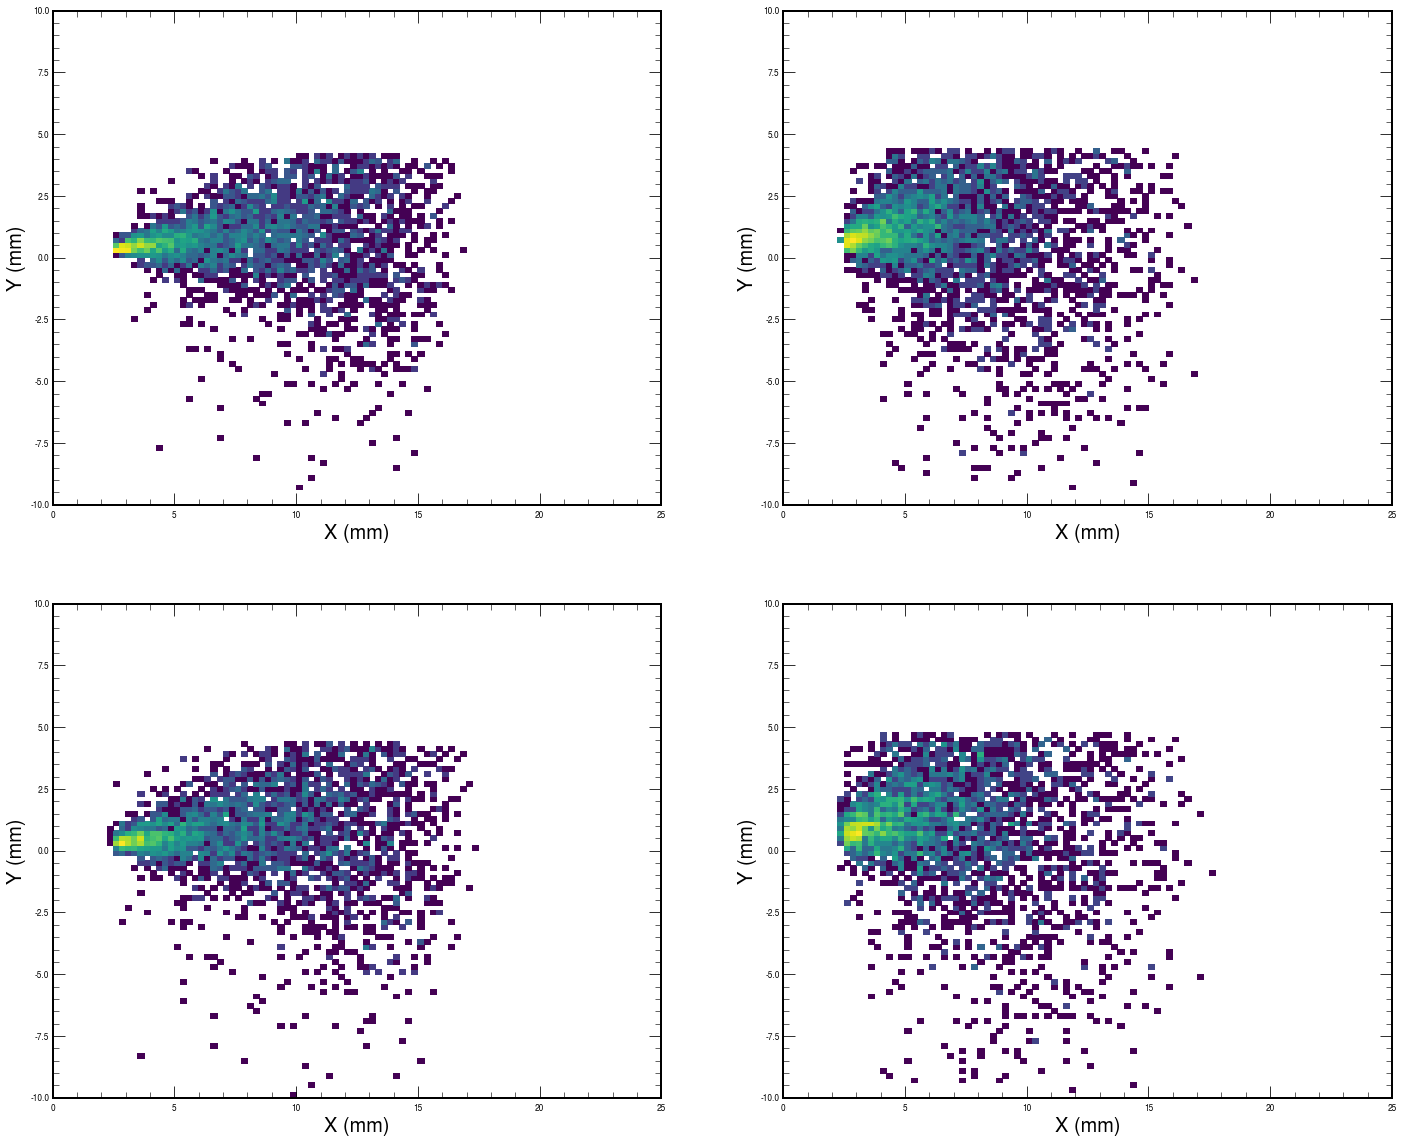

In [9]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_signal_index[ "trackx1" ][ msk1 ], df_protons_multiRP_signal_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_signal_index[ "trackx1" ][ msk2 ], df_protons_multiRP_signal_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_signal_index[ "trackx2" ][ msk1 ], df_protons_multiRP_signal_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_signal_index[ "trackx2" ][ msk2 ], df_protons_multiRP_signal_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

3687 3687


/usr/local/bin/start_ipykernel.py:12: RuntimeWarning: invalid value encountered in true_divide
/usr/local/bin/start_ipykernel.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$\\theta_x^{\\ast}$')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


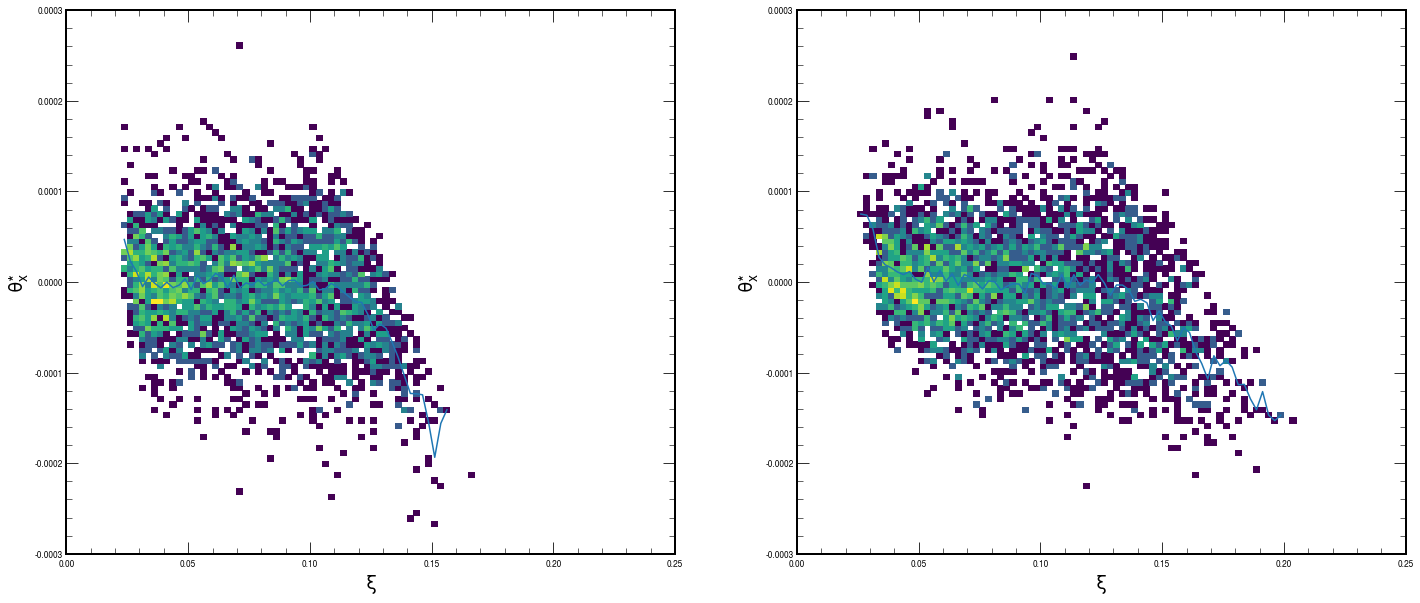

In [10]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_signal_index[ "xi" ][ msk1 ], df_protons_multiRP_signal_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_signal_index[ "xi" ][ msk2 ], df_protons_multiRP_signal_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Background

In [12]:
run_tables = True

label= "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-2017B.h5",
    "output-data-random-resample_20-2017C.h5",
    "output-data-random-resample_20-2017D.h5",
    "output-data-random-resample_20-2017E.h5",
    "output-data-random-resample_20-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = get_data( fileNames_bkg )
        df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = process_data_protons_multiRP( df_protons_multiRP_bkg, df_ppstracks_bkg, apply_fiducial=True, within_aperture=True, random_protons=True, runOnMC=False )

        store_[ "counts" ] = df_counts_bkg
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events
    
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/04 09:35:09
output-data-random-resample_20-2017B.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(140120, 57)
[[ 2.9710100e+05  2.1600000e+02  3.0255002e+08 ...  1.2395020e+00
   0.0000000e+00  2.3000000e+01]
 [ 2.9710100e+05  2.1600000e+02  3.0255002e+08 ...  4.1928711e+00
   0.0000000e+00  1.2300000e+02]
 [ 2.9729200e+05  8.7000000e+01  1.6202858e+08 ... -4.4003296e-01
   0.0000000e+00  2.3000000e+01]
 ...
 [ 2.9729200e+05  3.6100000e+02  6.4840147e+08 ... -4.3750000e-01
   0.0000000e+00  1.2300000e+02]
 [ 2.9729200e+05  3.8300000e+02  6.8909203e+08 ...  1.8542480e+00
   0.0000000e+00  2.3000000e+01]
 [ 2.9729200e+05  3.8300000e+02  6.8909203e+08 ...  2.7947998e-01
   0.0000000e+00  1.2300000e+02]]
(300020, 53)
[[2.9710100e+05 2.1600000e+02 3.0255002e+08 ... 1.0656738e+00
  0.0000000e+00 3.0000000e+00]
 [2.9710100e+05 2.1600000e+02 3.0255002e+08 ... 1.2395020e+00


      run  lumiblock      event  slice        xi       thx       thy  \
0  299480        217  317241952      0  0.041068  0.000073 -0.000023   
1  299480        217  317241952      0  0.053938 -0.000073  0.000038   
2  299480        217  316931840      0  0.051660  0.000043 -0.000104   
3  299480        217  316931840      0  0.049242 -0.000090  0.000037   
4  299480        255  368993344      0  0.104006 -0.000019 -0.000039   

          t  ismultirp  rpid  ...   event_rnd  slice_rnd    trackx1   tracky1  \
0 -0.240471          1   123  ...   107606392         13   4.500488  0.197845   
1 -0.271326          1   123  ...   107606392         13   2.593140 -0.174393   
2 -0.513292          1   123  ...  1089016704          6   5.932861  1.189575   
3 -0.381109          1   123  ...  1089016704          6   2.654541 -0.238358   
4 -0.080737          1   123  ...  1465059584          9  11.288086  2.065674   

   trackpixshift1  rpid1    trackx2   tracky2  trackpixshift2  rpid2  
0        

      run  lumiblock      event  slice        xi       thx       thy  \
0  302031        144  153945792      0  0.113933  0.000002 -0.000036   
1  302031        144  153945792      0  0.077596  0.000022 -0.000002   
2  302031        151  162034944      0  0.075082 -0.000015 -0.000014   
3  302031        151  162034944      0  0.045576 -0.000078 -0.000091   
4  302031        530  544442560      0  0.049858 -0.000048 -0.000030   

          t  ismultirp  rpid  ...   event_rnd  slice_rnd    trackx1   tracky1  \
0 -0.062622          1   123  ...   404582336          3  12.178223  2.760742   
1 -0.024644          1   123  ...   404582336          3   5.700195  0.273468   
2 -0.022256          1   123  ...   833579776         10   7.856201  0.450623   
3 -0.579323          1   123  ...   833579776         10   2.597900  1.432373   
4 -0.131561          1   123  ...  1146572928         19   4.647705  0.621033   

   trackpixshift1  rpid1    trackx2   tracky2  trackpixshift2  rpid2  
0        

      run  lumiblock       event  slice        xi  thx       thy         t  \
0  303885       1250  1650101376      0  0.095755  0.0 -0.000008 -0.011244   
1  303885       1250  1650101376      0  0.096190  0.0 -0.000007 -0.010900   
2  303885       1250  1650101376      0  0.051161  0.0 -0.000101 -0.413298   
3  303885       1250  1650101376      0  0.049346  0.0 -0.000107 -0.465340   
4  303885       1038  1425340032      0  0.103147  0.0  0.000007 -0.012104   

   ismultirp  rpid  ...  WLeptonicPt  WLeptonicPhi  run_rnd  lumiblock_rnd  \
0          0     3  ...   160.592911      1.218767   304738            674   
1          0    23  ...   160.592911      1.218767   304738            674   
2          0   103  ...   160.592911      1.218767   304738            674   
3          0   123  ...   160.592911      1.218767   304738            674   
4          0     3  ...    97.196579     -0.154222   304778            901   

    event_rnd  slice_rnd    trackx1   tracky1  trackpixshift1 

      run  lumiblock       event  slice        xi  thx       thy         t  \
0  305207        869  1382468992     18  0.115958  0.0 -0.000008 -0.015491   
1  305207        869  1382468992     18  0.115946  0.0 -0.000006 -0.014820   
2  305207        869  1382630144     18  0.139384  0.0 -0.000066 -0.179695   
3  305207        869  1382630144     18  0.140619  0.0 -0.000065 -0.174385   
4  305207        869  1382630144     18  0.071772  0.0  0.000030 -0.039607   

   ismultirp  rpid  ...  WLeptonicPt  WLeptonicPhi  run_rnd  lumiblock_rnd  \
0          0   103  ...   125.213661     -2.424231   305440            162   
1          0   123  ...   125.213661     -2.424231   305440            162   
2          0     3  ...   270.653839      1.174080   305809            173   
3          0    23  ...   270.653839      1.174080   305809            173   
4          0   103  ...   270.653839      1.174080   305809            173   

   event_rnd  slice_rnd    trackx1   tracky1  trackpixshift1  

           run  lumiblock       event  slice        xi  thx       thy  \
0       297101        216   302550016      0  0.058114  0.0 -0.000065   
1       297101        216   302550016      0  0.058885  0.0 -0.000065   
2       297101        216   302550016      0  0.119613  0.0 -0.000076   
3       297101        216   302550016      0  0.120721  0.0 -0.000075   
4       297292         87   162028576      0  0.049381  0.0  0.000033   
5       297292         87   162028576      0  0.051145  0.0  0.000029   
6       297292         87   162028576      0  0.090034  0.0 -0.000066   
7       297292         87   162028576      0  0.091608  0.0 -0.000065   
8       297050         23    23347598      0  0.038146  0.0 -0.000062   
9       297050         23    23347598      0  0.037816  0.0 -0.000062   
10      297050         23    23347598      0  0.096123  0.0  0.000055   
11      297050         23    23347598      0  0.036148  0.0 -0.000044   
12      297050         23    23347598      0  0.099

           run  lumiblock       event  slice          x         y  rpid  \
0       297101        216   302550016      0   5.621094  1.065674     3   
1       297101        216   302550016      0   8.532715  3.935059   103   
2       297101        216   302550016      0   5.739746  1.239502    23   
3       297101        216   302550016      0   8.485718  4.192871   123   
4       297292         87   162028576      0   4.710205 -0.389496     3   
5       297292         87   162028576      0   6.174561  2.247559   103   
6       297292         87   162028576      0   4.923218 -0.440033    23   
7       297292         87   162028576      0   6.192932  2.448730   123   
8       297050         23    23347598      0   3.574829  0.398071     3   
9       297050         23    23347598      0   6.644775 -2.079834   103   
10      297050         23    23347598      0   3.563660  0.499451    23   
11      297050         23    23347598      0   2.279755  0.322266   123   
12      297050         23

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2017B: 140120
2017C1: 404200
2017C2: 237600
2017D: 274000
2017E: 115840
2017F1: 126320
2017F2: 540040
2017F3: 183280
Within aperture: 1863320


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


                                         xi       thx       thy         t  \
run    lumiblock event      slice                                           
297101 216       302550016  0      0.053462  0.000038 -0.000089 -0.375001   
                            0      0.108715  0.000028 -0.000071 -0.232221   
297292 87        162028576  0      0.041559  0.000090  0.000020 -0.347821   
                            0      0.078012  0.000043 -0.000074 -0.290854   
297050 23        23347598   0      0.039482 -0.000016 -0.000056 -0.137540   
                            0      0.070625  0.000103  0.000083 -0.692292   
       65        78788008   0      0.094874 -0.000006 -0.000094 -0.349458   
                            0      0.088130  0.000026 -0.000054 -0.144942   
       499       605989248  0      0.046020  0.000002  0.000030 -0.037710   
                            0      0.044068  0.000065 -0.000112 -0.680873   
297411 315       507722016  0      0.115323 -0.000139 -0.000009 -0.740176   

Number of events: 813259


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


run     lumiblock  event       slice
297101  216        302550016   0         991.082153
297292  87         162028576   0         740.213928
297050  23         23347598    0         686.472717
        65         78788008    0        1188.718994
        499        605989248   0         585.438477
297411  315        507722016   0        1281.273071
        377        608603776   0         533.259521
297177  103        155861312   0         835.258789
        112        168879968   0         662.516785
297057  359        451236608   0        1477.063232
297219  2173       3099827968  0        1283.559326
                   3099778304  0        1190.692749
                   3100205568  0         857.619751
297425  58         92710800    0        1039.189087
297050  640        759692672   0         733.031860
        658        778318912   0         897.606995
        633        752294720   0         834.609375
                   752405312   0         832.814880
        635        75430041

In [13]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

['/counts', '/events_multiRP', '/protons_multiRP']


In [14]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_bkg = store_[ "counts" ]

df_counts_bkg

All          23824840
Jet          23824840
Muon         23420660
ProtonRnd     1010700
dtype: int64

In [15]:
if not df_ppstracks_bkg_index is None:
    print ( df_ppstracks_bkg_index.loc[ ( df_ppstracks_bkg_index.loc[ :, "rpid"] != 16 ) & ( df_ppstracks_bkg_index.loc[ :, "rpid"] != 116 ) ] )

                                           x         y  rpid  run_rnd  \
run    lumiblock event      slice                                       
297101 216       302550016  0       5.621094  1.065674     3   297101   
                            0       8.532715  3.935059   103   297101   
                            0       5.739746  1.239502    23   297101   
                            0       8.485718  4.192871   123   297101   
297292 87        162028576  0       4.710205 -0.389496     3   297425   
                            0       6.174561  2.247559   103   297425   
                            0       4.923218 -0.440033    23   297425   
                            0       6.192932  2.448730   123   297425   
297050 23        23347598   0       3.574829  0.398071     3   297100   
                            0       6.644775 -2.079834   103   297100   
                            0       3.563660  0.499451    23   297100   
                            0       2.279755  0.322

In [16]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]

df_protons_multiRP_bkg_index

xi       thx       thy         t  \
run    lumiblock event      slice                                           
297101 216       302550016  0      0.053462  0.000038 -0.000089 -0.375001   
                            0      0.108715  0.000028 -0.000071 -0.232221   
297292 87        162028576  0      0.041559  0.000090  0.000020 -0.347821   
                            0      0.078012  0.000043 -0.000074 -0.290854   
297050 23        23347598   0      0.039482 -0.000016 -0.000056 -0.137540   
                            0      0.070625  0.000103  0.000083 -0.692292   
       65        78788008   0      0.094874 -0.000006 -0.000094 -0.349458   
                            0      0.088130  0.000026 -0.000054 -0.144942   
       499       605989248  0      0.046020  0.000002  0.000030 -0.037710   
                            0      0.044068  0.000065 -0.000112 -0.680873   
297411 315       507722016  0      0.115323 -0.000139 -0.000009 -0.740176   
                            0      0.084233 -0.000093  0.000012 -0.349463   
       377       608603776  0      0.036584 -0.000039 -0.000136 -0.817616   
                            0      0.045994  0.000036 -0.000064 -0.218576   
297177 103       155861312  0      0.098408 -0.000010 -0.000046 -0.094515   
                            0      0.041949 -0.000018  0.000023 -0.036352   
       112       168879968  0      0.031520  0.000010 -0.000105 -0.458029   
                            0      0.082399  0.000013 -0.000029 -0.044631   
297057 359       451236608  0      0.106113  0.000021  0.000082 -0.282647   
                            0      0.121658 -0.000046  0.000034 -0.137009   
297219 2173      3099827968 0      0.110110 -0.000058  0.000136 -0.828586   
                            0      0.088535 -0.000016  0.000038 -0.074267   
                 3099778304 0      0.085628 -0.000019 -0.000052 -0.126524   
                            0      0.097971  0.000012 -0.000035 -0.062447   
                 3100205568 0      0.064005  0.000013 -0.000050 -0.109867   
                            0      0.067996  0.000111  0.000013 -0.500302   
297425 58        92710800   0      0.054420 -0.000051  0.000128 -0.756824   
                            0      0.117419 -0.000043 -0.000041 -0.147571   
297050 640       759692672  0      0.098115  0.000050  0.000003 -0.104387   
                            0      0.032406  0.000085 -0.000010 -0.301718   
...                                     ...       ...       ...       ...   
306459 1869      2114651776 19     0.075466  0.000102 -0.000005 -0.408678   
                            19     0.079539  0.000053  0.000068 -0.297220   
       1879      2122675584 19     0.100968 -0.000057  0.000102 -0.525407   
                            19     0.100081 -0.000055  0.000114 -0.614762   
       1917      2153233664 19     0.121838 -0.000069  0.000011 -0.198203   
                            19     0.100650 -0.000047  0.000031 -0.130061   
       1918      2154504960 19     0.071186 -0.000021 -0.000016 -0.032231   
                            19     0.134318  0.000012  0.000004 -0.024157   
       1921      2156298752 19     0.081648 -0.000017  0.000020 -0.032470   
                            19     0.043885  0.000191 -0.000085 -1.765381   
       1935      2167983104 19     0.042370 -0.000008  0.000023 -0.025239   
                            19     0.123699  0.000033  0.000053 -0.158749   
       2049      2261035008 19     0.121838 -0.000069  0.000011 -0.198203   
                            19     0.100650 -0.000047  0.000031 -0.130061   
       2056      2267724288 19     0.065892  0.000110 -0.000133 -1.183879   
                            19     0.148771 -0.000129  0.000083 -0.869932   
       2118      2325344768 19     0.035844  0.000054 -0.000178 -1.417512   
                            19     0.039895  0.000034  0.000050 -0.147486   
       2146      2351191552 19     0.047618  0.000037 -0.000083 -0.338462   
                            19     0.

In [17]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]

df_protons_multiRP_bkg_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 216       302550016  0      253.968201 -0.707324  2.950644   
297292 87        162028576  0      211.335602  0.778516 -2.783820   
297050 23        23347598   0      261.334717 -1.010473  1.135294   
       65        78788008   0      223.571411 -0.640955 -1.560675   
       499       605989248  0      247.993744 -0.750684 -1.880714   
297411 315       507722016  0      202.485367 -1.909996 -2.974470   
       377       608603776  0      241.069107 -0.283513  2.425223   
297177 103       155861312  0      205.575821  1.169397 -2.365454   
       112       168879968  0      249.287399 -0.463456  0.465937   
297057 359       451236608  0      394.285278  0.398574 -1.529445   
297219 2173      3099827968 0      288.619812  0.455739  0.454244   
                 3099778304 0      375.724274  0.520944 -0.466679   
                 3100205568 0      247.402695 -1.569887  0.242396   
297425 58        92710800   0      456.756805 -0.825246  1.224345   
297050 640       759692672  0      356.842926 -1.857062  1.034243   
       658       778318912  0      323.938354 -2.283609  2.840562   
       633       752294720  0      281.741394  1.049507  3.116731   
                 752405312  0      203.592255 -1.403587  1.493702   
       635       754300416  0      278.962280  2.154710 -2.295970   
       634       753442816  0      460.727081  1.591670  1.678488   
297178 492       640713216  0      265.786072 -1.436197  2.916315   
       928       1117250816 0      221.970551  1.839407 -2.844628   
       934       1123346688 0      216.444809 -1.182309  0.281944   
       18        25319148   0      294.096222  0.964350 -0.131271   
297050 713       835222272  0      343.445770 -0.632300  2.582244   
       86        108647864  0      256.000824 -1.426670 -1.053994   
299062 265       435280032  0      244.149170 -0.604448 -0.558302   
297292 748       1328492032 0      535.040283  1.342581 -0.895196   
297296 187       272401184  0      212.937958 -0.785442 -2.647174   
297429 13        21205478   0      231.507278 -0.895174 -2.024890   
...                                       ...       ...       ...   
306459 1598      1885703040 19     217.410233 -1.200829 -1.304179   
       1618      1903291264 19     225.517120 -0.155592 -2.440748   
       1637      1920020608 19     270.782318  1.650888 -3.062332   
                 1919742080 19     201.078217  1.137169 -1.139690   
       1650      1931075840 19     350.534760  0.815430  2.617693   
       1751      2018049920 19     234.543533  1.967514 -2.917407   
       1760      2025497600 19     214.932495  1.016446  0.671875   
       1759      2024725248 19     218.322159  0.988271 -3.022544   
       1773      2036224512 19     209.766968  1.671885 -1.481306   
       1777      2039804544 19     224.089188 -0.661872  2.803730   
       1785      2045943552 19     205.878540  1.328550 -1.412123   
       1812      2068438528 19     242.638275  0.771410  2.544757   
       1988      2209089792 19     282.538086 -0.796685  0.624611   
       2074      2285000192 19     210.236755 -0.401668  2.699004   
       2142      2347176704 19     249.445282  1.115450 -2.272424   
       1869      2114651776 19     337.237457  0.058818 -0.090941   
       1879      2122675584 19     310.677246  0.887925  0.790629   
       1917      2153233664 19     263.333893  0.527616 -2.832640   
       1918      2154504960 19     201.965515  0.733784 -0.222779   
       1921      2156298752 19     502.180756  0.960758 -0.874312   
       1935      2167983104 19     285.716370 -0.516591 -2.033982   
       2049      2261035008 19     293.169739 -1.283291 -1.368515   
       2056      2267724288 19     206.734772 -1.683780 -1.360564   
       2118      2325344768 19     251.551193 -2.113370 -0.537527   
       2146      2351191552 19     212.687027  0.225404 -1.777314   
       2148      2352906752 19     2

813293 813284


Text(0, 0.5, 'Y (mm)')

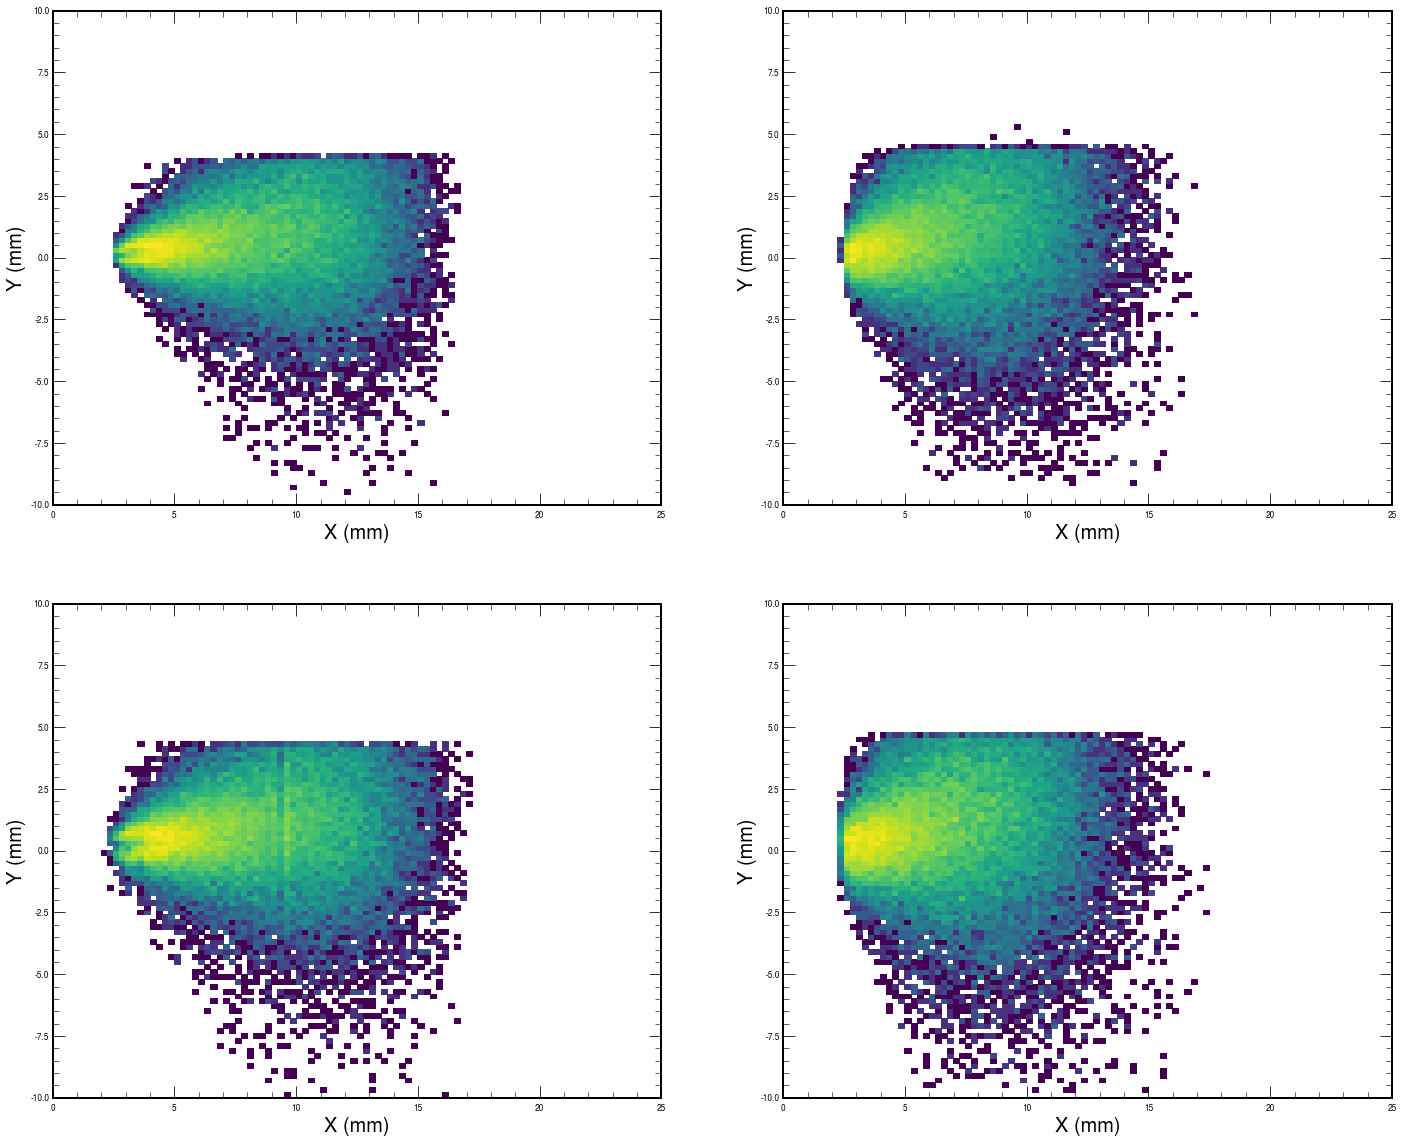

In [18]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

813293 813284


/usr/local/bin/start_ipykernel.py:12: RuntimeWarning: invalid value encountered in true_divide
/usr/local/bin/start_ipykernel.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$\\theta_x^{\\ast}$')

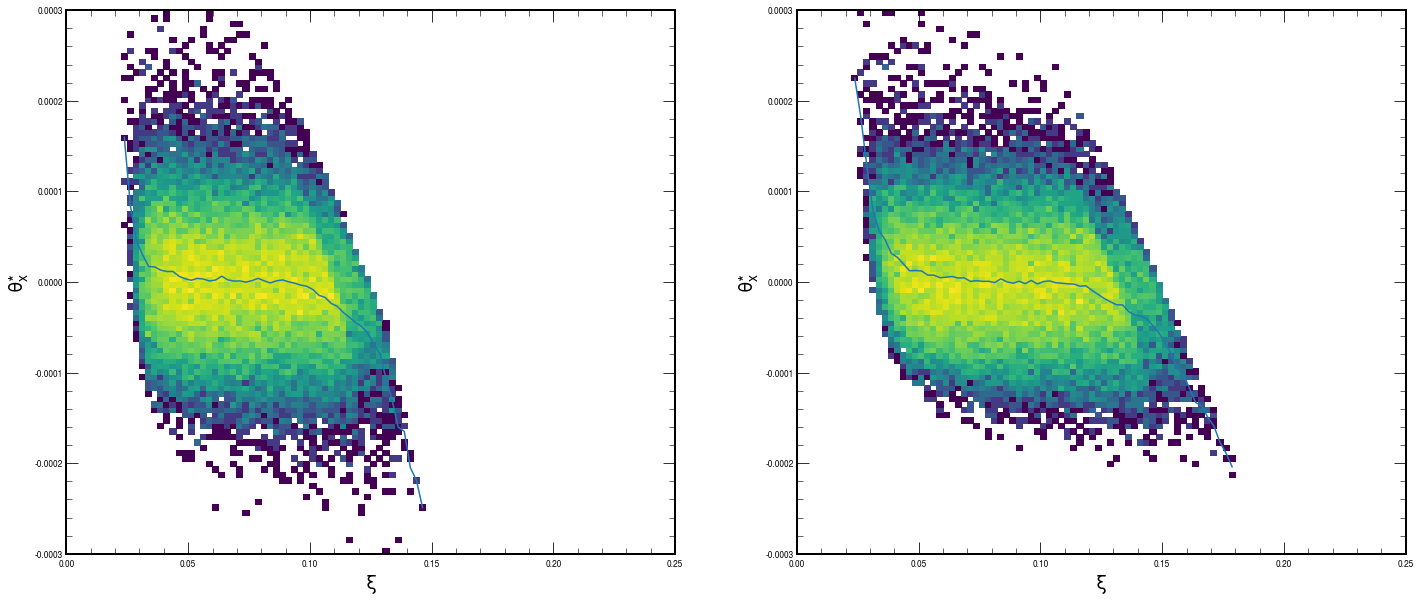

In [19]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk1 ], df_protons_multiRP_bkg_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk2 ], df_protons_multiRP_bkg_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

In [20]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
}

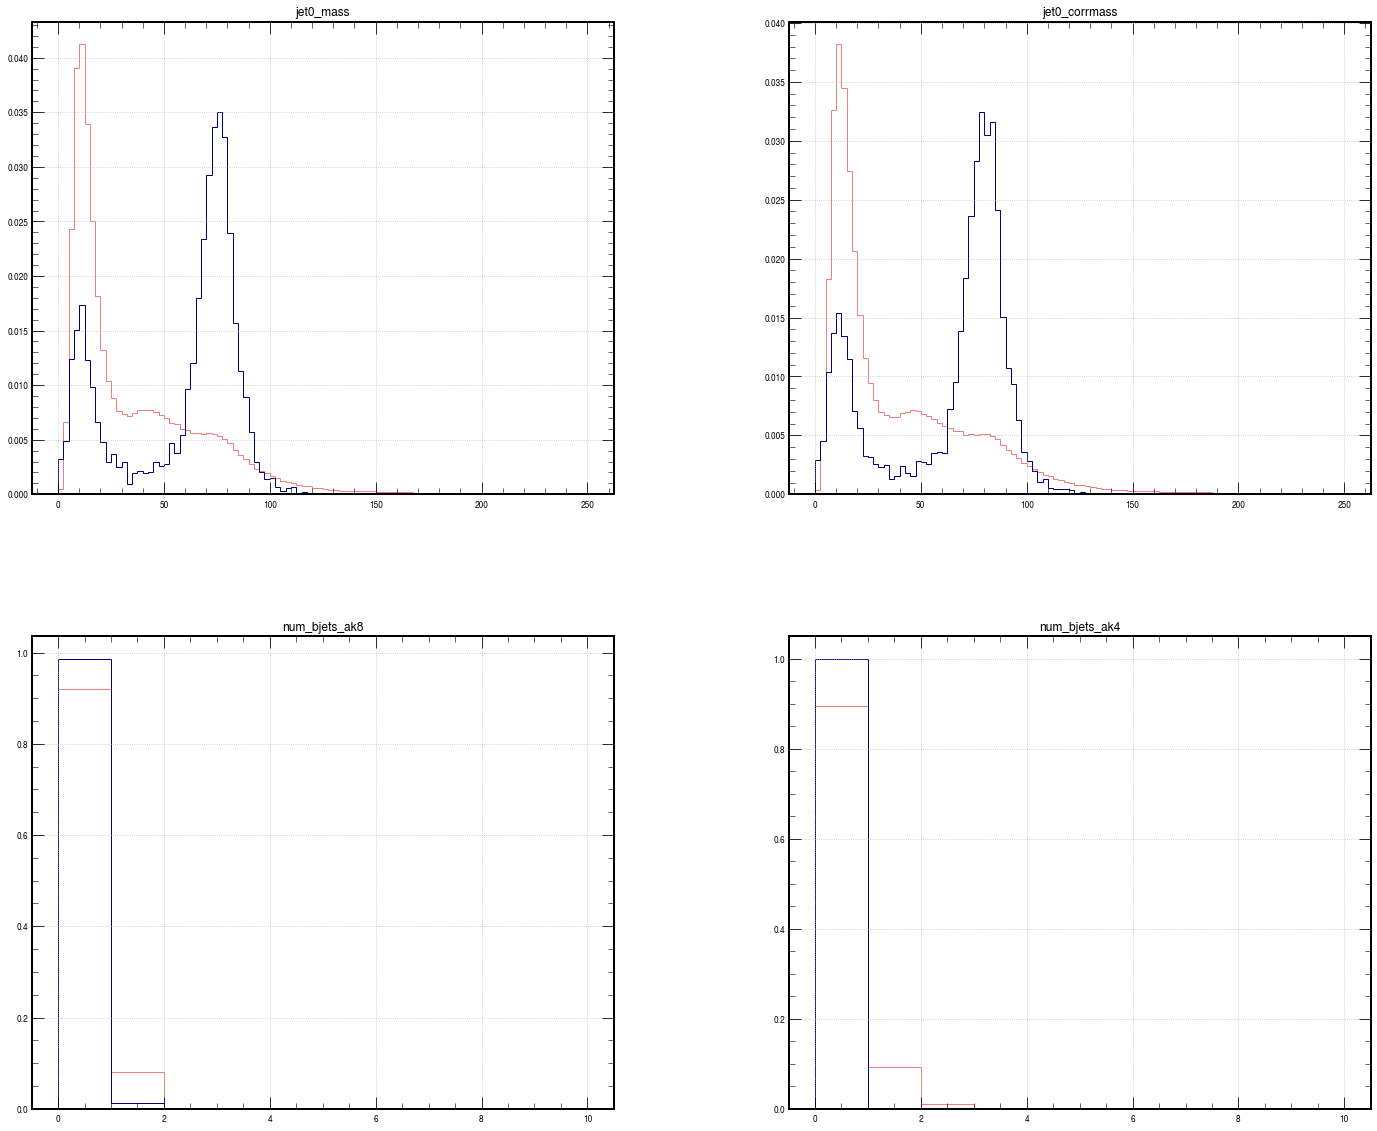

In [21]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 1 ] )
df_protons_multiRP_signal_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1

df_protons_multiRP_bkg_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_,  1 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1


In [22]:
msk_bkg = ( ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
            ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] <= 110.0 ) & 
            ( df_protons_multiRP_bkg_events.loc[ :, "num_bjets_ak4"] == 0 ) )
msk_signal = ( ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] <= 110.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "num_bjets_ak4"] == 0 ) )
df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_signal_events = df_protons_multiRP_signal_events.loc[ msk_signal ]

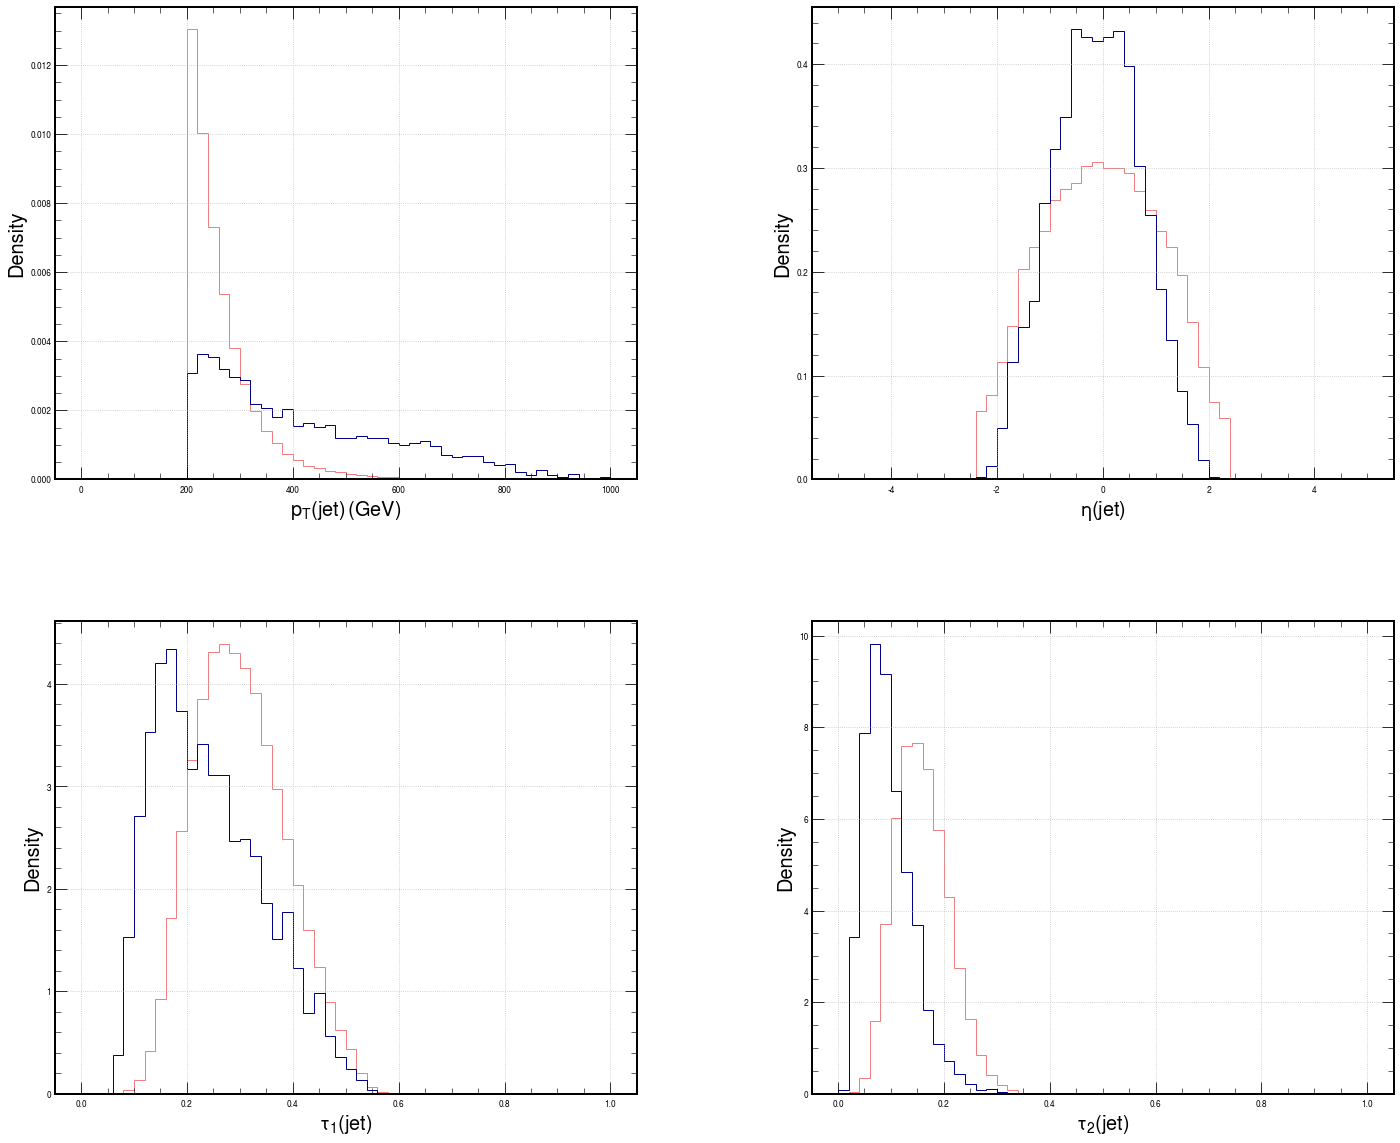

In [23]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\rm{jet}) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$\tau_1 (\rm{jet})$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\tau_2 (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Jet.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Jet.png", bbox_inches='tight' )

#  'run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 
#  'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 
#  'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 
#  'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 
#  'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi'

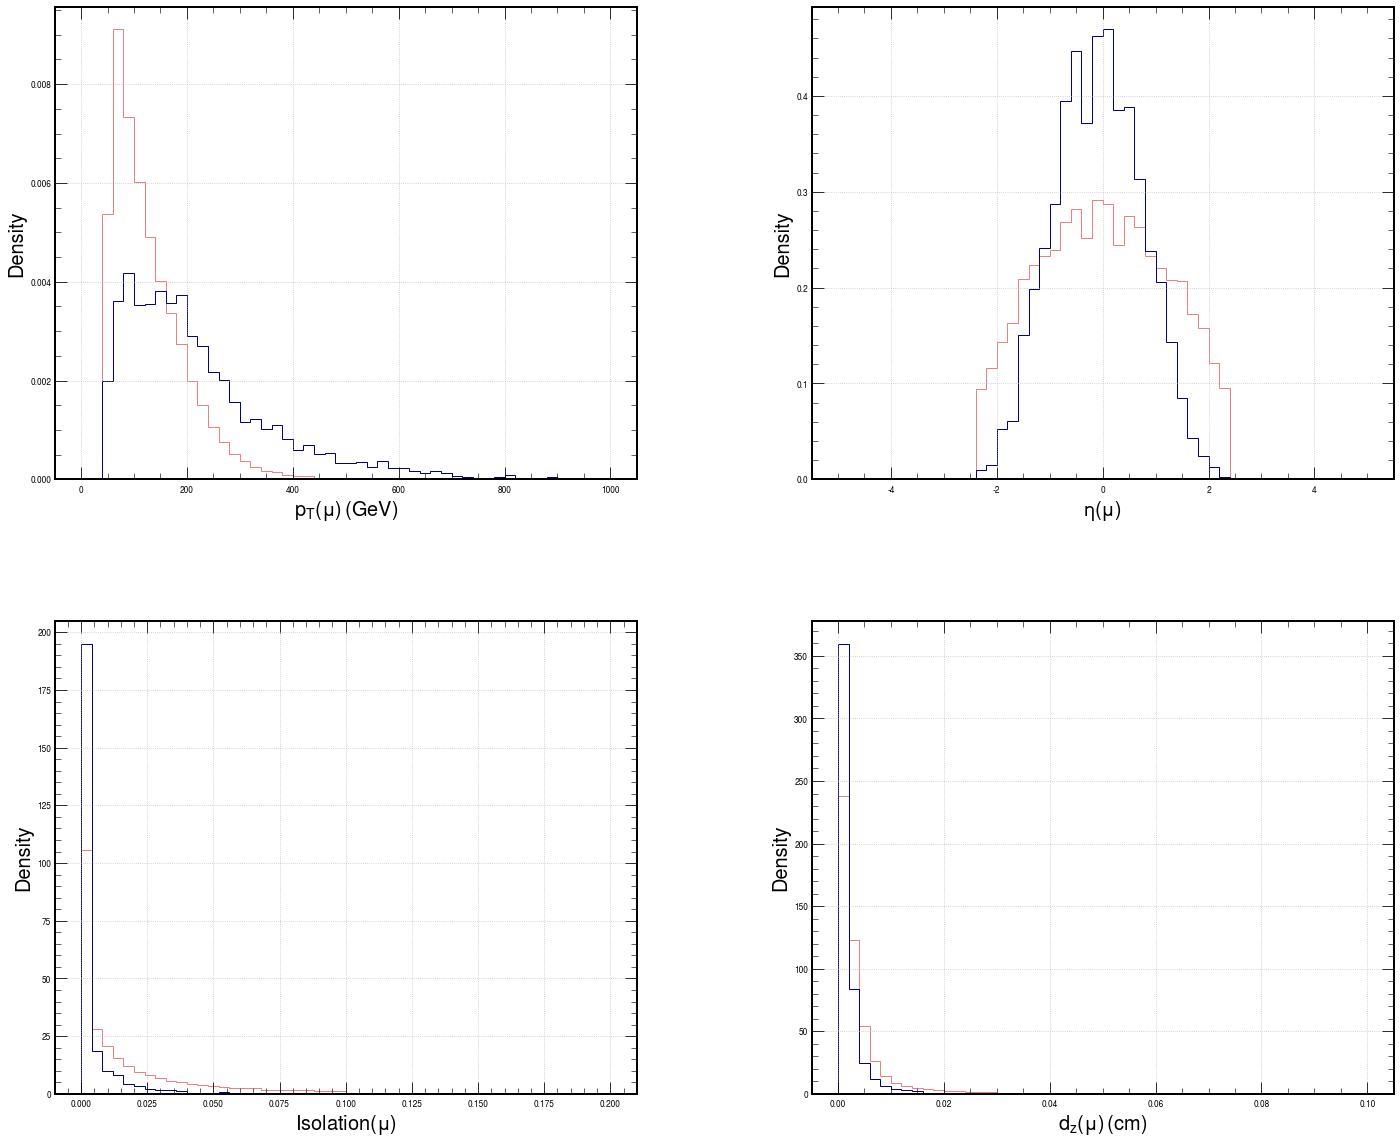

In [24]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\mu) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\mu)$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$Isolation (\mu)$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$d_z (\mu) \,\rm{(cm)}$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Muon.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Muon.png", bbox_inches='tight' )

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


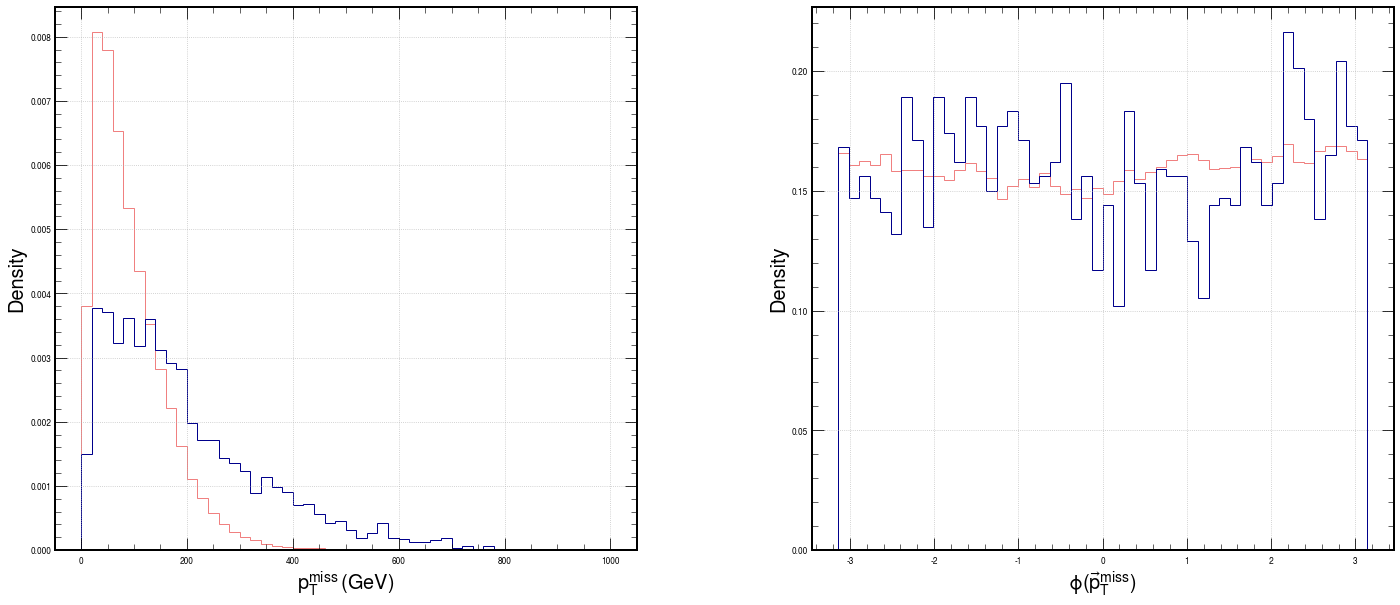

In [25]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}}^{\rm{miss}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi({\vec p}_{\rm{T}}^{\rm{miss}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_MET.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_MET.png", bbox_inches='tight' )

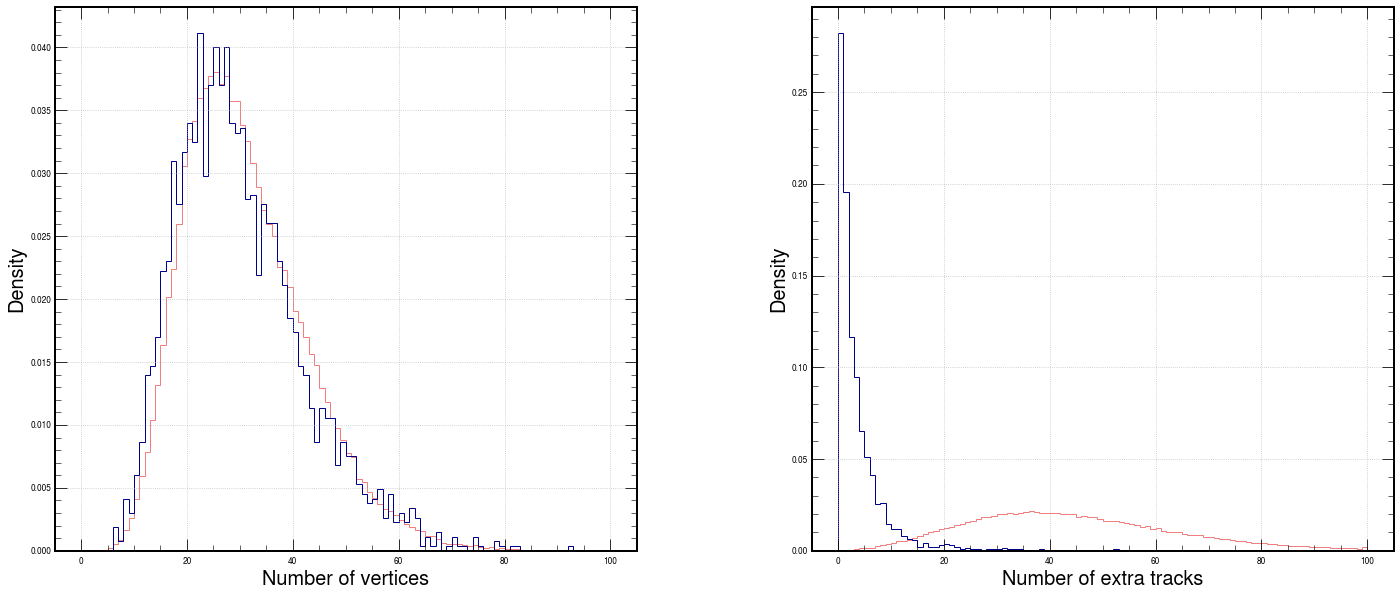

In [26]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( "Number of vertices", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( "Number of extra tracks", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.png", bbox_inches='tight' )

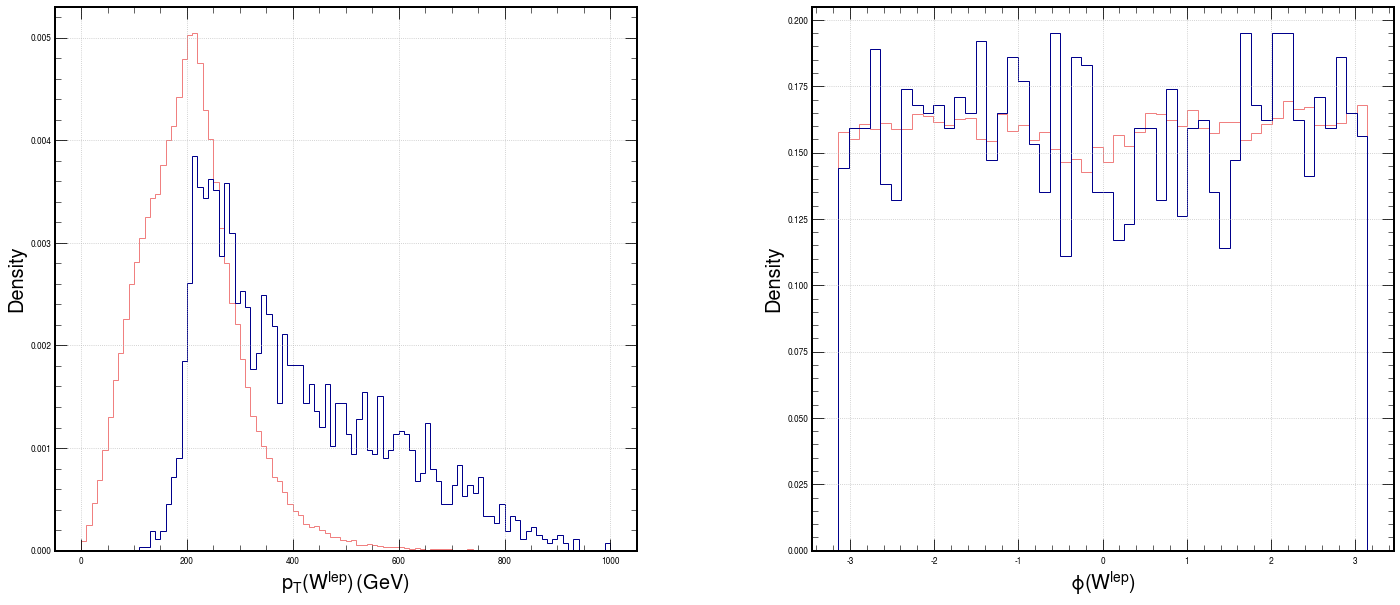

In [27]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}} (W^{\rm{lep}}) \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi (W^{\rm{lep}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_WLeptonic.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_WLeptonic.png", bbox_inches='tight' )

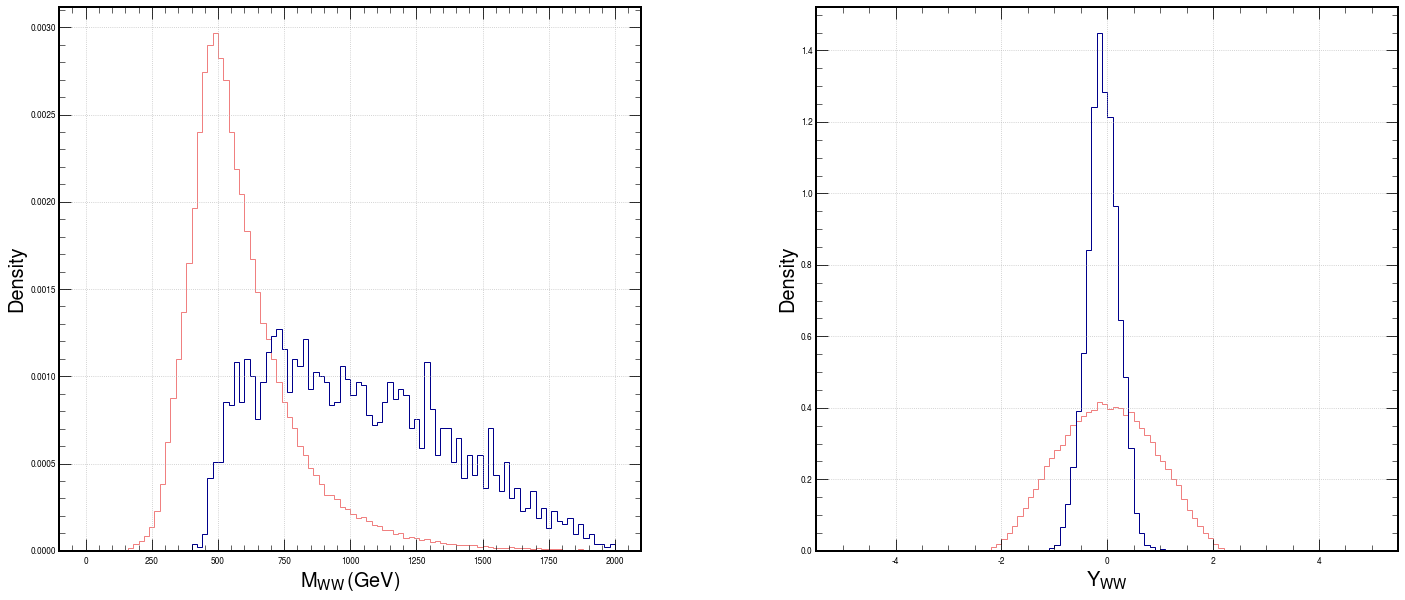

In [28]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.png", bbox_inches='tight' )

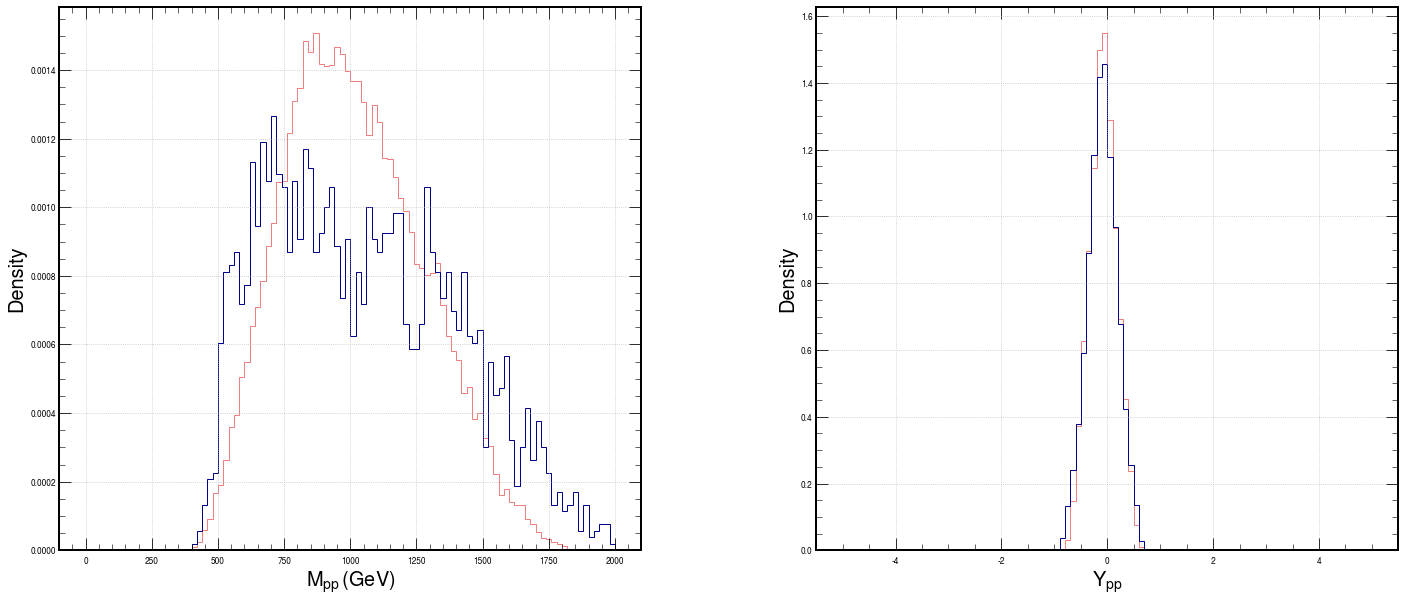

In [29]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{\rm{pp}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.png", bbox_inches='tight' )

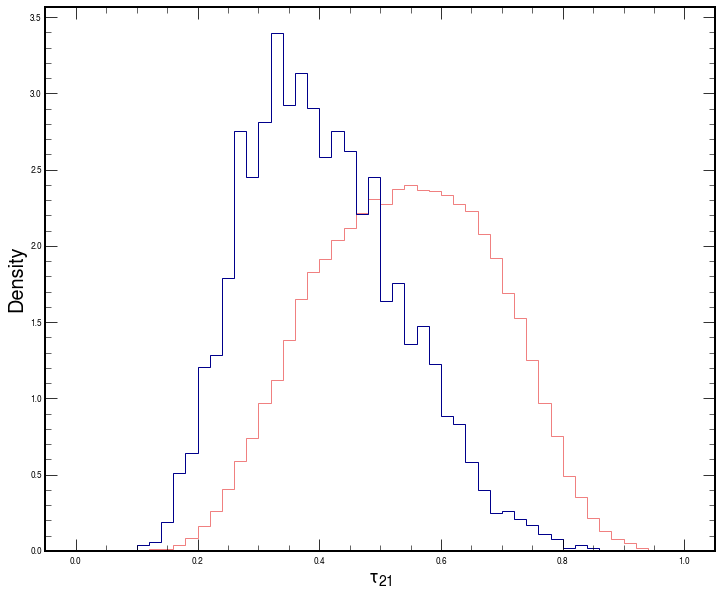

In [30]:
fig = plt.figure( figsize=(12,10) )

plt.hist( ( df_protons_multiRP_bkg_events[ "jet0_tau2" ] / df_protons_multiRP_bkg_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral" )
plt.hist( ( df_protons_multiRP_signal_events[ "jet0_tau2" ] / df_protons_multiRP_signal_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue" )
plt.xlabel( r"$\tau_{21}$", fontsize=20 )
plt.ylabel( "Density", fontsize=20 )
plt.title( "" )

if save_figures:
    plt.savefig( "plots/Variables_tau21.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_tau21.png", bbox_inches='tight' )

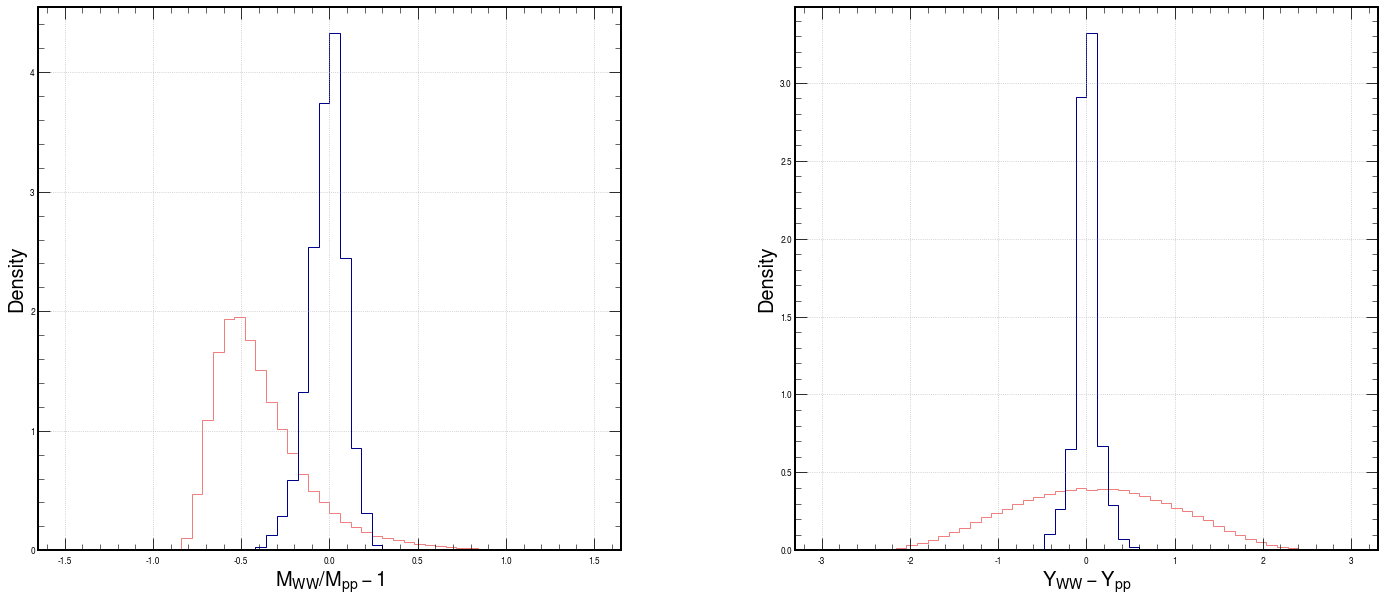

In [31]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} / M_{\rm{pp}} - 1$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW} - Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.png", bbox_inches='tight' )

In [32]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

Number of events: 9104.1
Number of events (A): 968.75
Number of events (B): 2532.6
Number of events (C): 1426.1
Number of events (D): 4176.65


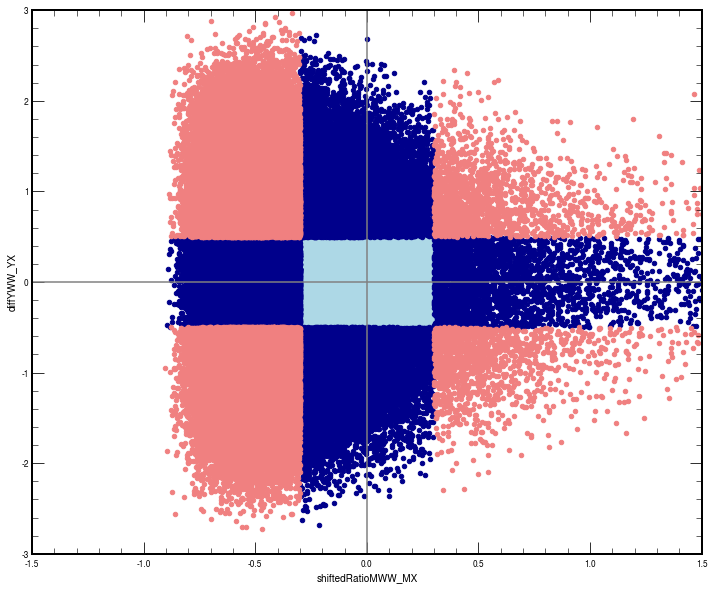

In [33]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg   = df_protons_multiRP_bkg_events.shape[0]
n_events_bkg_A = df_protons_multiRP_bkg_events[ msk_bkg_A ].shape[0]
n_events_bkg_B = df_protons_multiRP_bkg_events[ msk_bkg_B ].shape[0]
n_events_bkg_C = df_protons_multiRP_bkg_events[ msk_bkg_C ].shape[0]
n_events_bkg_D = df_protons_multiRP_bkg_events[ msk_bkg_D ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_bkg / resample_factor ) )
print ( "Number of events (A): {}".format( n_events_bkg_A / resample_factor ) )
print ( "Number of events (B): {}".format( n_events_bkg_B / resample_factor ) )
print ( "Number of events (C): {}".format( n_events_bkg_C / resample_factor ) )
print ( "Number of events (D): {}".format( n_events_bkg_D / resample_factor ) )

### Data

In [34]:
run_tables = True

label = "data"

fileNames_data = [
    'output-data-2017B.h5',
    'output-data-2017C.h5',
    'output-data-2017D.h5',
    'output-data-2017E.h5',
    'output-data-2017F.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
        df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

        store_[ "counts" ] = df_counts_data
        store_[ "protons_multiRP"] = df_protons_multiRP_data_index
        store_[ "events_multiRP" ] = df_protons_multiRP_data_events
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/04 10:22:49
output-data-2017B.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(7006, 53)
[[2.9705000e+05 5.6000000e+01 6.7470672e+07 ... 1.3073730e+00
  0.0000000e+00 2.3000000e+01]
 [2.9705000e+05 5.6000000e+01 6.7470672e+07 ... 2.9580688e-01
  0.0000000e+00 1.2300000e+02]
 [2.9729200e+05 6.9000000e+01 1.2953881e+08 ... 4.4003296e-01
  0.0000000e+00 2.3000000e+01]
 ...
 [2.9717800e+05 1.2700000e+02 1.7770869e+08 ... 2.5993652e+00
  0.0000000e+00 1.2300000e+02]
 [2.9717800e+05 1.2200000e+02 1.7063189e+08 ... 7.5195312e-01
  0.0000000e+00 2.3000000e+01]
 [2.9717800e+05 1.2200000e+02 1.7063189e+08 ... 1.1993408e+00
  0.0000000e+00 1.2300000e+02]]
(15001, 49)
[[2.9705000e+05 5.6000000e+01 6.7470672e+07 ... 1.1317139e+00
  0.0000000e+00 3.0000000e+00]
 [2.9705000e+05 5.6000000e+01 6.7470672e+07 ... 4.7290039e-01
  0.0000000e+00 2.3000000e+01]
 [2.9705000e+05 5.6000000e+

      run  lumiblock      event  slice        xi  thx       thy         t  \
0  299480        638  895071872      0  0.036631  0.0 -0.000267 -2.899435   
1  299480        638  895071872      0  0.034568  0.0 -0.000275 -3.089735   
2  299480        638  895071872      0  0.103599  0.0 -0.000008 -0.012690   
3  299480        638  895071872      0  0.101206  0.0 -0.000006 -0.011348   
4  299480        638  894755008      0  0.050071  0.0  0.000011 -0.007569   

   ismultirp  rpid  ...   recoMWlep     recoMWW  recoRapidityWW    dphiWW  \
0          0     3  ...   80.380058  508.754791        0.313969 -3.103829   
1          0    23  ...   80.380058  508.754791        0.313969 -3.103829   
2          0   103  ...   80.380058  508.754791        0.313969 -3.103829   
3          0   123  ...   80.380058  508.754791        0.313969 -3.103829   
4          0     3  ...  128.094162  620.057190        0.413370  2.522858   

   WLeptonicPt  WLeptonicPhi   trackx1   tracky1  trackpixshift1  rpid1  


      run  lumiblock   event  slice         x         y  rpid
0  302031          1  592629      0  2.917603 -0.031183     3
1  302031          1  592629      0  6.743652  1.525391   103
2  302031          1  592629      0  3.055695  0.000000    16
3  302031          1  592629      0  3.335693  0.000000    16
4  302031          1  592629      0  2.874939 -0.003574    23
Data set size: 37085
output-data-2017E.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(5792, 53)
[[ 3.0479700e+05  2.7650000e+03  3.4585475e+09 ...  4.4526367e+00
   0.0000000e+00  2.3000000e+01]
 [ 3.0479700e+05  2.7650000e+03  3.4585475e+09 ...  4.3939209e-01
   0.0000000e+00  1.2300000e+02]
 [ 3.0479700e+05  2.7940000e+03  3.4763016e+09 ...  1.2233887e+00
   0.0000000e+00  2.3000000e+01]
 ...
 [ 3.0479700e+05  1.4220000e+03  2.3339889e+09 ...  2.0092773e+00
   0.0000000e+00  1.2300000e+02]
 [ 3.0479700e+0

      run  lumiblock       event  slice        xi  thx       thy         t  \
0  305336        204   331789344      0  0.135094  0.0 -0.000064 -0.168197   
1  305336        204   331789344      0  0.134937  0.0 -0.000063 -0.165163   
2  305336        204   331789344      0  0.114380  0.0 -0.000102 -0.400385   
3  305336        204   331789344      0  0.115626  0.0 -0.000100 -0.389565   
4  306154       1125  2016040320      0  0.092988  0.0 -0.000049 -0.098948   

   ismultirp  rpid  ...  recoMWlep     recoMWW  recoRapidityWW    dphiWW  \
0          0     3  ...  80.378014  653.070374        0.805147 -2.771757   
1          0    23  ...  80.378014  653.070374        0.805147 -2.771757   
2          0   103  ...  80.378014  653.070374        0.805147 -2.771757   
3          0   123  ...  80.378014  653.070374        0.805147 -2.771757   
4          0     3  ...  80.380394  614.213501       -1.112753  2.634678   

   WLeptonicPt  WLeptonicPhi    trackx1   tracky1  trackpixshift1  rpid1  

           run  lumiblock       event  slice        xi  thx           thy  \
0       297050         56    67470672      0  0.046668  0.0 -1.065866e-04   
1       297050         56    67470672      0  0.045017  0.0 -4.028079e-05   
2       297050         56    67470672      0  0.045873  0.0 -2.097725e-04   
3       297050         56    67470672      0  0.046300  0.0 -1.054250e-04   
4       297050         56    67470672      0  0.046469  0.0 -6.470447e-05   
5       297050         56    67470672      0  0.041207  0.0 -3.237147e-05   
6       297050         56    67470672      0  0.039958  0.0 -3.171279e-05   
7       297292         69   129538808      0  0.074535  0.0 -1.694772e-05   
8       297292         69   129538808      0  0.074849  0.0 -1.582161e-05   
9       297292         69   129538808      0  0.158644  0.0 -1.208616e-05   
10      297292         69   129538808      0  0.160546  0.0 -1.164831e-05   
11      297292         87   163111984      0  0.059792  0.0 -7.951110e-05   

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2017B: 7006
2017C1: 20210
2017C2: 11880
2017D: 13700
2017E: 5792
2017F1: 6316
2017F2: 27002
2017F3: 9164
Within aperture: 93166
                                         xi       thx       thy         t  \
run    lumiblock event      slice                                           
297050 56        67470672   0      0.048623 -0.000018 -0.000086 -0.313532   
                            0      0.046856 -0.000036 -0.000017 -0.067508   
297292 87        163111984  0      0.056913  0.000022 -0.000069 -0.212477   
                            0      0.064017  0.000047 -0.000039 -0.150144   
297308 10        8493683    0      0.045801  0.000108 -0.000134 -1.193339   
                            0      0.105662 -0.000048  0.000023 -0.115943   
297219 836       1500202752 0      0.055662  0.000105  0.000002 -0.439648   
                            0      0.058800 -0.000027 -0.000051 -0.134417   
297101 387       522259744  0      0.044496  0.000025  0.000007 -0.029883   
                         

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


run     lumiblock  event       slice
297050  56         67470672    0         620.507629
297292  87         163111984   0         784.684448
297308  10         8493683     0         904.361084
297219  836        1500202752  0         743.723877
297101  387        522259744   0         858.235718
                   522966400   0        1323.042114
297219  2421       3327403520  0        1356.774536
297425  58         93611808    0         628.371216
297050  643        762052992   0         579.889648
        645        764970432   0         690.819336
                   764774720   0         601.014526
        774        896489920   0         519.571777
        633        752284416   0        1054.012939
297178  94         132224208   0         822.784546
        312        419430400   0        1057.096924
                   418433600   0         856.207764
299062  231        376998688   0         679.624939
        265        435268736   0         745.050110
297050  770        89273715

In [35]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

['/counts', '/events_multiRP', '/protons_multiRP']


In [36]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_data = store_[ "counts" ]

df_counts_data

All       1191242
Jet       1191242
Muon      1171033
Proton      50535
dtype: int64

In [38]:
if not df_ppstracks_data_index is None:
    print ( df_ppstracks_data_index.loc[ ( ( df_ppstracks_data_index.loc[ :, "rpid" ] != 16 ) & ( df_ppstracks_data_index.loc[ :, "rpid" ] != 116 ) ) ] )

                                           x         y  rpid
run    lumiblock event      slice                           
297050 56        67470672   0       4.432373  1.131714     3
                            0       2.658569  0.259583   103
                            0       4.291016  0.472900    23
                            0       4.378540  2.555176    23
                            0       4.422302  1.307373    23
                            0       4.439636  0.808044    23
                            0       2.531616  0.295807   123
297292 69        129538808  0       7.405029  0.427216     3
                            0      11.958984  0.948120   103
                            0       7.490601  0.440033    23
                            0      11.943237  0.981079   123
       87        163111984  0       5.799072  1.377930     3
                            0       5.010498  0.689636   103
                            0       5.884583  1.534546    23
                        

In [39]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
        
df_protons_multiRP_data_index

xi       thx       thy         t  \
run    lumiblock event      slice                                           
297050 56        67470672   0      0.048623 -0.000018 -0.000086 -0.313532   
                            0      0.046856 -0.000036 -0.000017 -0.067508   
297292 87        163111984  0      0.056913  0.000022 -0.000069 -0.212477   
                            0      0.064017  0.000047 -0.000039 -0.150144   
297308 10        8493683    0      0.045801  0.000108 -0.000134 -1.193339   
                            0      0.105662 -0.000048  0.000023 -0.115943   
297219 836       1500202752 0      0.055662  0.000105  0.000002 -0.439648   
                            0      0.058800 -0.000027 -0.000051 -0.134417   
297101 387       522259744  0      0.044496  0.000025  0.000007 -0.029883   
                            0      0.097951 -0.000021  0.000026 -0.053014   
                 522966400  0      0.078112 -0.000042 -0.000094 -0.414409   
                            0      0.132600 -0.000058 -0.000014 -0.147670   
297219 2421      3327403520 0      0.085299  0.000069 -0.000019 -0.204593   
                            0      0.127697 -0.000097 -0.000022 -0.380567   
297425 58        93611808   0      0.044258 -0.000069 -0.000055 -0.313885   
                            0      0.052791 -0.000009 -0.000076 -0.238971   
297050 643       762052992  0      0.057468  0.000086 -0.000024 -0.322467   
                            0      0.034624  0.000066 -0.000067 -0.361813   
       645       764970432  0      0.048548 -0.000056 -0.000189 -1.556884   
                            0      0.058166  0.000020 -0.000008 -0.021391   
                 764774720  0      0.049980  0.000024 -0.000151 -0.940766   
                            0      0.042765  0.000107 -0.000065 -0.632093   
       774       896489920  0      0.040651  0.000024  0.000027 -0.054294   
                            0      0.039295 -0.000015 -0.000116 -0.556692   
       633       752284416  0      0.056617 -0.000075 -0.000105 -0.661527   
                            0      0.116107 -0.000006 -0.000082 -0.266595   
297178 94        132224208  0      0.090287 -0.000128  0.000002 -0.637286   
                            0      0.044367  0.000081 -0.000176 -1.515406   
       312       419430400  0      0.081189 -0.000024 -0.000070 -0.219288   
                            0      0.081441  0.000026 -0.000076 -0.255863   
...                                     ...       ...       ...       ...   
306459 1869      2115035392 0      0.030245  0.000059  0.000013 -0.150721   
                            0      0.058370 -0.000054  0.000055 -0.237708   
       1906      2144585344 0      0.063998  0.000078 -0.000006 -0.244503   
                            0      0.125924  0.000007  0.000009 -0.020787   
       1912      2149141760 0      0.028250  0.000034  0.000027 -0.078191   
                            0      0.135167  0.000010  0.000023 -0.042352   
       1921      2156900352 0      0.104393 -0.000004  0.000022 -0.029546   
                            0      0.101058 -0.000059 -0.000046 -0.224123   
       2056      2267444736 0      0.101514 -0.000077 -0.000014 -0.241909   
                            0      0.076803 -0.000096 -0.000103 -0.778021   
       2094      2303803136 0      0.059514  0.000004 -0.000105 -0.440532   
                            0      0.044852 -0.000024 -0.000095 -0.392950   
       2101      2310278144 0      0.117545 -0.000107 -0.000010 -0.447608   
                            0      0.082837  0.000040 -0.000007 -0.072043   
       2145      2349884160 0      0.095937  0.000107 -0.000045 -0.521223   
                            0      0.123401 -0.000045  0.000055 -0.199327   
       2134      2339939072 0      0.091619 -0.000033 -0.000025 -0.072803   
                            0      0.110271 -0.000096 -0.000026 -0.385758   
       2140      2344984064 0      0.036916  0.000160  0.000138 -1.815829   
                            0      0.

In [40]:
if not run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_protons_multiRP_data_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297050 56        67470672   0      202.515182  0.893716 -0.328976   
297292 87        163111984  0      203.507202 -1.973928  1.850590   
297308 10        8493683    0      290.445282 -2.193158 -0.117516   
297219 836       1500202752 0      216.316467 -1.696552 -0.598422   
297101 387       522259744  0      246.350983 -0.594037 -0.614068   
                 522966400  0      205.969086 -0.020873 -2.800861   
297219 2421      3327403520 0      269.640167 -1.433301 -2.952790   
297425 58        93611808   0      235.661011 -0.611991 -1.141669   
297050 643       762052992  0      313.062256  0.543361  2.810169   
       645       764970432  0      204.346054  0.975615  0.864856   
                 764774720  0      207.091217 -1.865878  1.208510   
       774       896489920  0      271.473541 -1.300484 -1.209756   
       633       752284416  0      369.918152  1.142806 -2.564265   
297178 94        132224208  0      255.724213  0.363403  0.723975   
       312       419430400  0      211.951309 -1.351781 -2.307238   
                 418433600  0      226.731140 -0.617662  2.187049   
299062 231       376998688  0      232.567459 -2.280924 -2.570825   
       265       435268736  0      222.904709  1.173962 -2.920347   
297050 770       892737152  0      212.374405  0.932070  1.202618   
297101 743       944915392  0      244.500687  1.865416 -1.131230   
                 944671936  0      257.151428  0.360481  0.236535   
297056 95        129487680  0      344.122223 -2.077486  3.024415   
297057 26        34862300   0      249.390442 -0.232392 -0.584449   
       38        51045240   0      201.343002 -2.254826 -1.126783   
       101       136385072  0      307.275391 -0.290665 -0.217202   
       22        29534116   0      447.185883 -0.000613  1.265319   
       62        84077728   0      245.630280 -0.994978 -1.096636   
       95        128495352  0      227.339127  0.794664  0.932532   
       628       758136896  0      355.903381 -0.560849 -1.522514   
       45        61759184   0      300.237305  0.306843 -2.309073   
...                                       ...       ...       ...   
306459 1651      1932454912 0      210.878372 -0.356407  1.105248   
                 1932163072 0      252.017120 -1.193693  2.093736   
       1751      2017728128 0      350.195496  1.990022  1.276328   
       1761      2026159488 0      218.901276 -1.596846  1.668334   
       1783      2044298880 0      229.064301  1.338926 -2.155442   
       1792      2051527040 0      275.115845  0.656393 -2.878673   
       2002      2219731200 0      212.166794  0.142665  2.855508   
       2019      2232822016 0      209.316895  1.577590  2.845863   
       1789      2049723904 0      209.272095  0.751143  1.617669   
       2187      2388165888 0      206.199905 -0.375075  1.401224   
       2083      2293278976 0      228.308121 -1.453601  0.744085   
       1823      2077442304 0      227.127029  0.574638  2.409352   
       1826      2079772544 0      226.722046 -1.014673 -2.028915   
       1834      2086098048 0      241.405319 -1.651375 -2.366571   
       1868      2113905024 0      345.052002 -0.047603  3.022051   
       1869      2115035392 0      322.501587 -0.423945  0.895586   
       1906      2144585344 0      256.368103  0.182558  2.152278   
       1912      2149141760 0      282.922089  0.836062 -0.719072   
       1921      2156900352 0      250.560974 -1.250332  0.853360   
       2056      2267444736 0      310.997406 -1.291370  1.798592   
       2094      2303803136 0      240.081146 -0.915328  2.323144   
       2101      2310278144 0      273.047363 -0.116818 -0.225741   
       2145      2349884160 0      244.470123 -0.230602  2.688353   
       2134      2339939072 0      293.516357  1.561485  1.106613   
       2140      2344984064 0      220.124832 -1.253929  0.997569   
       2155      2359360768 0      2

40664 40664


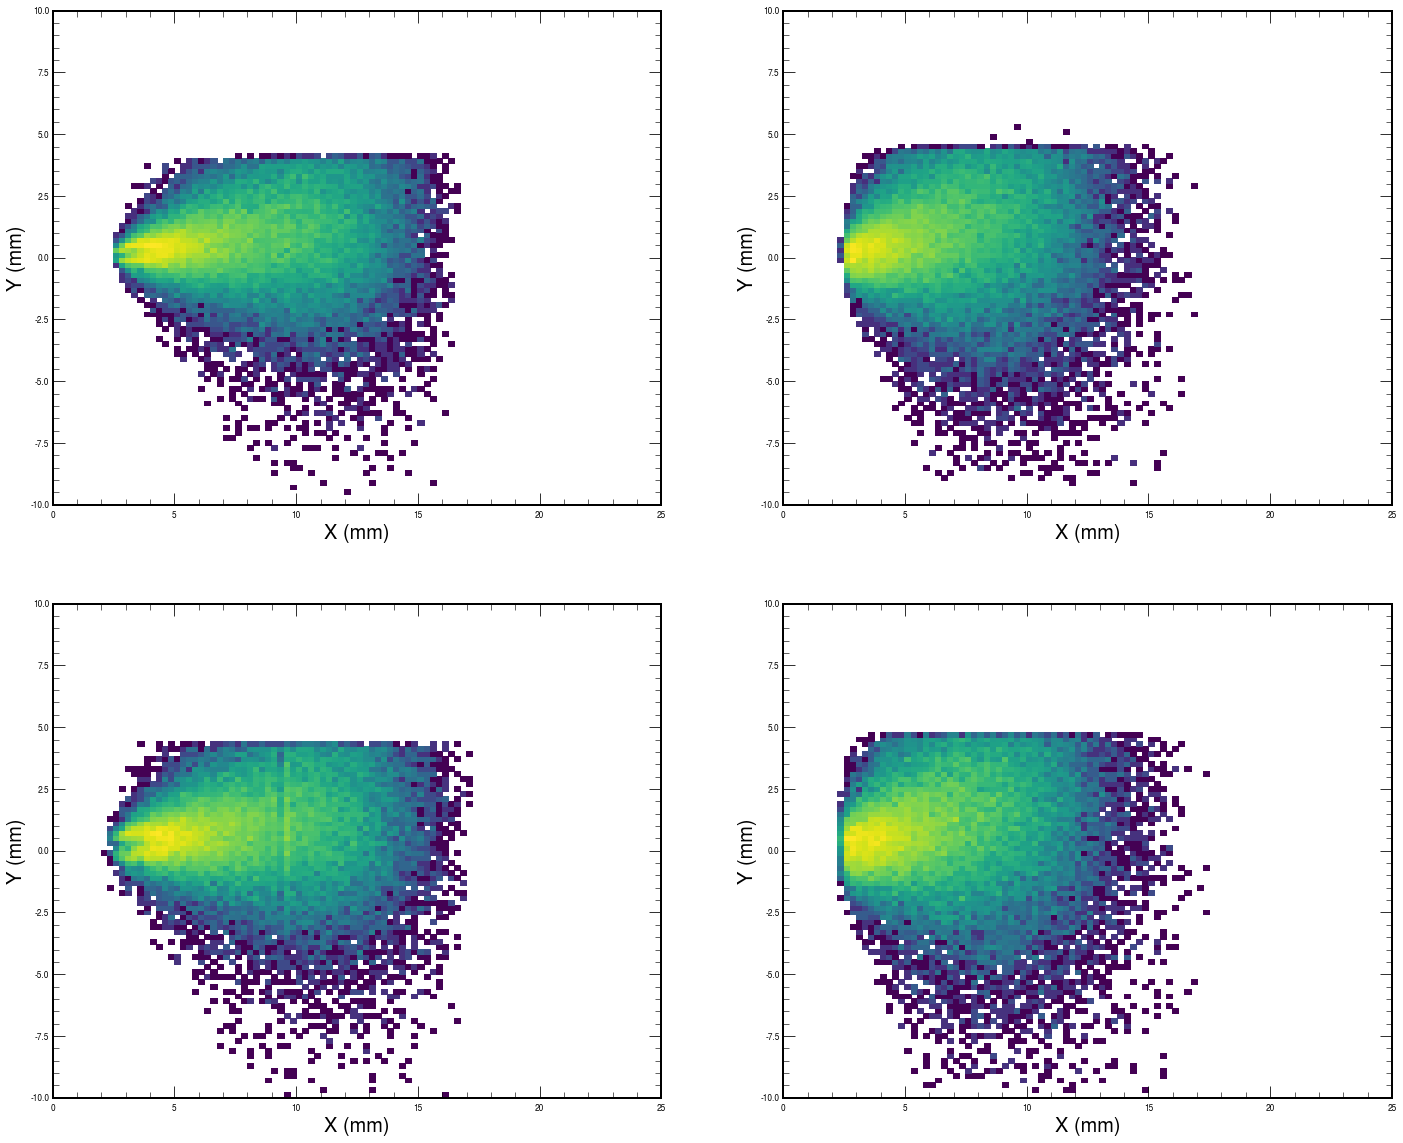

In [41]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk1 ], df_protons_multiRP_data_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk2 ], df_protons_multiRP_data_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk1 ], df_protons_multiRP_data_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk2 ], df_protons_multiRP_data_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )
if save_figures:
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.png", bbox_inches='tight' )

40664 40664


/usr/local/bin/start_ipykernel.py:12: RuntimeWarning: invalid value encountered in true_divide
/usr/local/bin/start_ipykernel.py:18: RuntimeWarning: invalid value encountered in true_divide


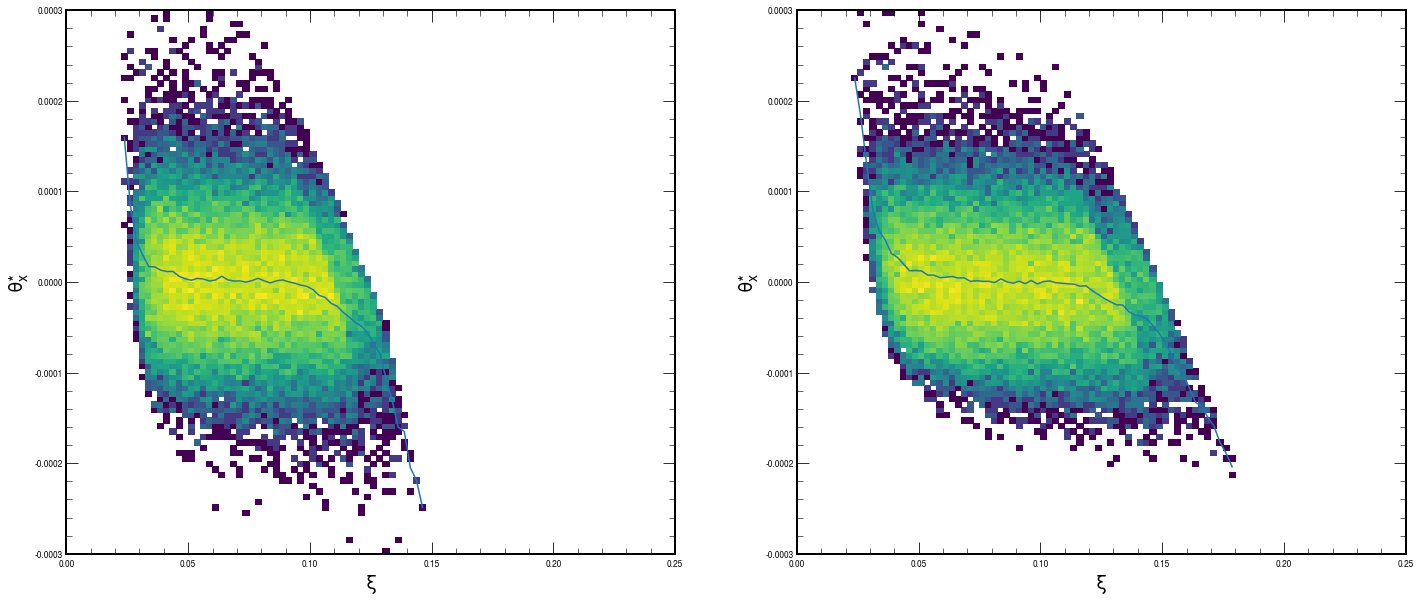

In [42]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk1 ], df_protons_multiRP_data_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk2 ], df_protons_multiRP_data_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
if save_figures:
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.pdf", bbox_inches='tight' )
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.png", bbox_inches='tight' )

In [43]:
msk_data = ( ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.loc[ msk_data ]

In [44]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A

Number of events (B): 3067 - Ratio: 1.21100844981442
Number of events (C): 1630 - Ratio: 1.1429773508169134
Number of events (D): 4821 - Ratio: 1.1542743586367066


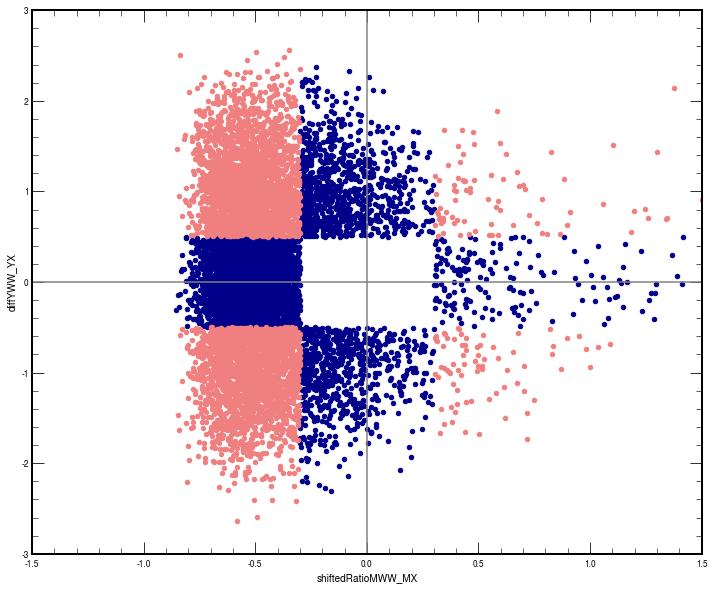

In [45]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ) )

### References